# ***What is Credit Risk?***

* ความน่าจะเป็นที่จะไม่ได้เงินคืนจากการให้ยืม

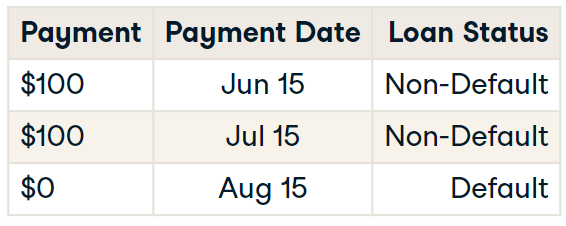

จากตัวอย่างนี้ ให้ยืมเงินไป \$300 จ่ายคืนมาแค่สองงวด 


# ***Expected Loss***
* 3 Components
  1. ความน่าจะเป็นที่จะโดนชักดาบ $(PD)$
  2. Exposure at Default: จำนวนเงินที่ลูกหนี้ยังไม่จ่าย $(EAD = 100)$
  3. Loss given Default: สมมติขายหนี้เสียได้ \$20,  $(LGD = 80\%)$

  $$Expected \ Loss = PD\times EAD \times LGD$$

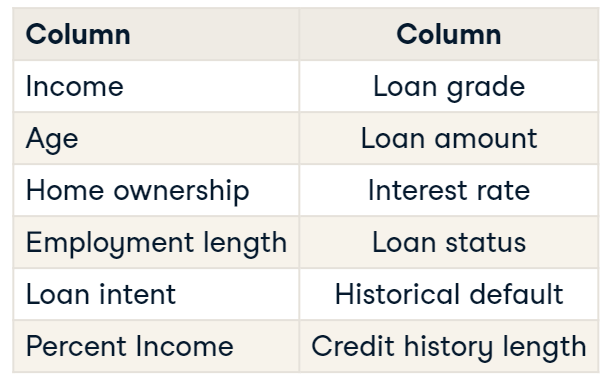

* ใช้ `pd.crosstab` ดูข้อมูล คล้ายๆ pivot tables

In [ ]:
import pandas as pd

cr_loan = pd.read_csv('cr_loan2.csv')

pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], values=cr_loan['loan_int_rate'], aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


This can also be implemented using **`groupby`** and **`unstack`**.

In [ ]:
cr_loan.groupby(['person_home_ownership', 'loan_status'])['loan_int_rate'].mean().unstack('loan_status').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


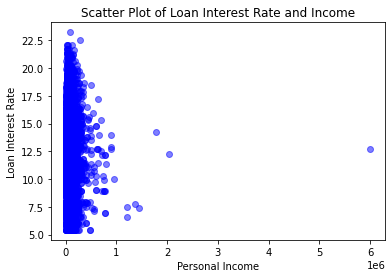

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(cr_loan['person_income'], cr_loan['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel("Personal Income")
plt.ylabel("Loan Interest Rate")
plt.title("Scatter Plot of Loan Interest Rate and Income")
plt.show()

### ***Explore the credit data***

Begin by looking at the data set `cr_loan`. In this data set, `loan_status` shows whether the loan is currently in default with `1` being default and `0` being non-default.

You have more columns within the data, and many could have a relationship with the values in `loan_status`. You need to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

The data set `cr_loan` has already been loaded in the workspace.

1. Print the structure of the `cr_loan` data.
2. Look at the first five rows of the data.
3. Plot a histogram of `loan_amnt` within the data.
4. Create a scatter plot of a person's income and age. In this case, income is the independent variable and age is the dependent variable.

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  ...  cb_person_cred_hist_length
0          22  ...                           3
1          21  ...                           2
2          25  ...                           3
3          23  ...                           2
4          24  ...                           4

[5 rows x 12 columns]


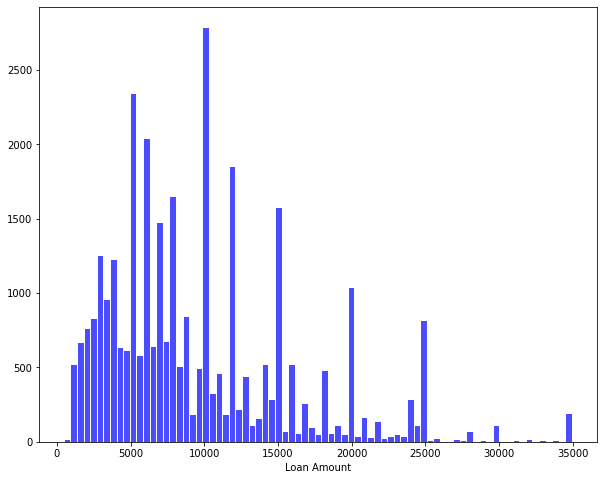

There are 32 000 rows of data so the scatter plot may take a little while to plot.


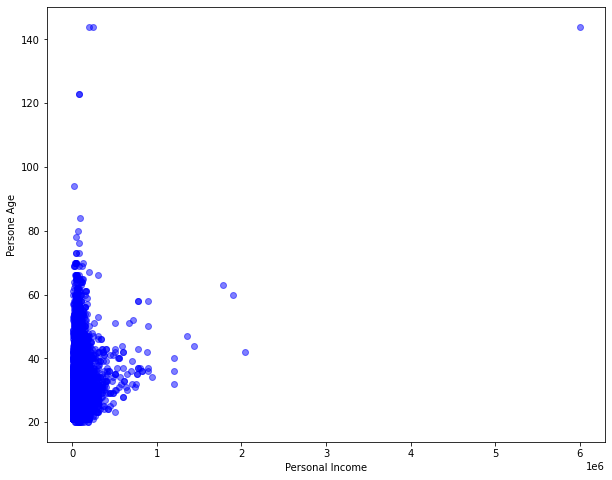

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cr_loan = pd.read_csv('cr_loan2.csv')

# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
print(cr_loan.head())

# Look at the distribution of loan amounts with a histogram
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.figure(figsize=(10, 8))
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

We can already see a positive correlation with `age` and `income`, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.

### ***Crosstab and pivot tables***

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, you get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like `person_emp_length` and `person_home_ownership` are common to begin investigating.

You will be able to see how the values are populated throughout the data, and visualize them. For now, you need to check how `loan_status` is affected by factors like home ownership status, loan grade, and loan percentage of income.

The data set `cr_loan` has been loaded in the workspace.

* Create a cross table of `loan_intent` and `loan_status`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cr_loan = pd.read_csv('cr_loan2.csv')

# Create a cross table of the loan intent and loan status
display(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))
display(cr_loan.groupby(['loan_intent', 'loan_status'])['person_age'].count().unstack('loan_status'))

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3722,1490
EDUCATION,5342,1111
HOMEIMPROVEMENT,2664,941
MEDICAL,4450,1621
PERSONAL,4423,1098
VENTURE,4872,847


* Create a cross table of home ownership grouped by `loan_status` and `loan_grade`.

In [ ]:
# Create a cross table of home ownership, loan status, and grade
display(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))
display(cr_loan.groupby(['person_home_ownership', 'loan_status', 'loan_grade'])['person_age'].count().unstack(['loan_status', 'loan_grade']).fillna(0))

loan_status               0                        ...    1                   
loan_grade                A     B     C    D    E  ...    C     D    E   F   G
person_home_ownership                              ...                        
MORTGAGE               5219  3729  1934  658  178  ...  321   553  161  61  31
OTHER                    23    29    11    9    2  ...    6    11    6   2   0
OWN                     860   770   464  264   26  ...   31    18   31   8   5
RENT                   3602  4222  2710  554  137  ...  981  1559  423  99  27

[4 rows x 14 columns]

loan_status                 0                         ...      1                0
loan_grade                  A       B       C      D  ...      E     F     G    G
person_home_ownership                                 ...                        
MORTGAGE               5219.0  3729.0  1934.0  658.0  ...  161.0  61.0  31.0  0.0
OTHER                    23.0    29.0    11.0    9.0  ...    6.0   2.0   0.0  0.0
OWN                     860.0   770.0   464.0  264.0  ...   31.0   8.0   5.0  0.0
RENT                   3602.0  4222.0  2710.0  554.0  ...  423.0  99.0  27.0  1.0

[4 rows x 14 columns]

* Create a cross table of home ownership, loan status, and average `loan_percent_income`.

In [ ]:
# Create a cross table of home ownership, loan status, and average percent income
display(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


* Create a boxplot of the loan's percent of the person's income grouped by `loan_status`.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


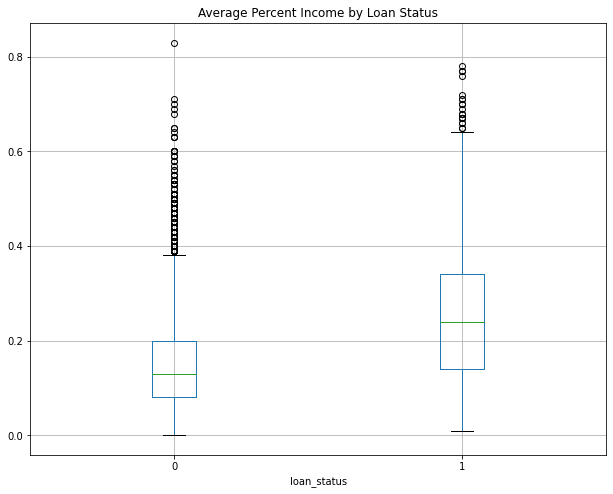

In [ ]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column=['loan_percent_income'], by='loan_status', figsize=(10,8))
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults (`1`) is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

# ***Outliers***

### ***Finding outliers with cross tables***

Now you need to find and remove outliers you suspect might be in the data. For this exercise, you can use cross tables and aggregate functions.

Have a look at the `person_emp_length` column. You've used the `aggfunc='mean'` argument to see the average of a numeric column before, but to detect outliers you can use other functions like `min` and `max`.

It may not be possible for a person to have an employment length of less than `0` or greater than `60`. You can use cross tables to check the data and see if there are any instances of this!

The data set `cr_loan` has been loaded in the workspace.

* Print the cross table of `loan_status` and `person_home_ownership` with the max `person_emp_length`.
* Create and array of indices for records with an employment length greater than 60. Store it as `indices`.
* Drop the records from the data using the array `indices` and create a new dataframe called `cr_loan_new`.
* Print the cross table from earlier, but instead use both `min` and `max`.

In [ ]:
import pandas as pd

cr_loan = pd.read_csv('cr_loan2.csv')

# Create the cross table for loan status, home ownership, and the max employment length
display(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
display(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
                  values=cr_loan_new['person_emp_length'], aggfunc=('min', 'max')))

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


max                        min                
person_home_ownership MORTGAGE OTHER   OWN  RENT MORTGAGE OTHER  OWN RENT
loan_status                                                              
0                         38.0  24.0  31.0  41.0      0.0   0.0  0.0  0.0
1                         34.0  11.0  17.0  27.0      0.0   0.0  0.0  0.0

Generally with credit data, key columns like `person_emp_length` are of high quality, but there is always room for error. 

### ***Visualizing credit outliers***

You discovered outliers in `person_emp_length` where values greater than `60` were far above the norm. `person_age` is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over `100` years old.

Visualizing the data here can be another easy way to detect outliers. You can use other numeric columns like `loan_amnt` and `loan_int_rate` to create plots with `person_age` to search for outliers.

* Create a scatter plot of person age on the x-axis and `loan_amnt` on the y-axis.
* Use the `.drop()` method from Pandas to remove the outliers and create `cr_loan_new`.
* Create a scatter plot of age on the x-axis and loan interest rate on the y-axis with a label for `loan_status`.

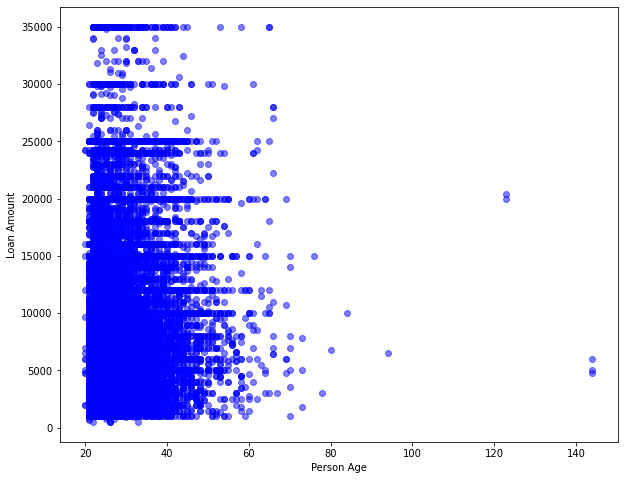

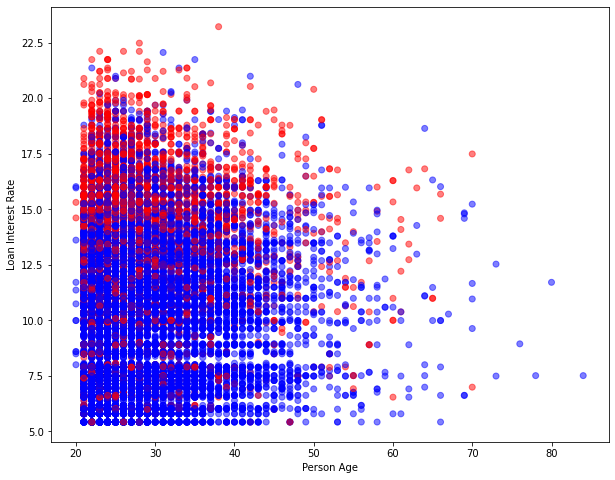

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

cr_loan = pd.read_csv('cr_loan2.csv')

# Create the scatter plot for age and amount
plt.figure(figsize=(10, 8))
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

# Use Pandas to drop the record from the data frame and create a new one
plt.figure(figsize=(10, 8))
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(["blue","red"]),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Notice that in the last plot we have `loan_status` as a label for colors. This shows a different color depending on the class. In this case, it's loan default *(red)* and non-default *(blue)*, and it looks like there are more defaults with high interest rates.

# ***Handle missing values in Credit data***

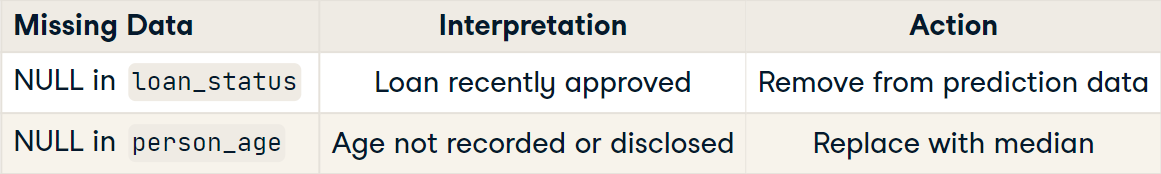

## ***Finding missing values***



In [ ]:
import pandas as pd

cr_loan = pd.read_csv('cr_loan2.csv')

cr_loan.isnull().any()


person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [ ]:
cr_loan.columns[cr_loan.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [ ]:
cr_loan[cr_loan.columns[cr_loan.isnull().any()]].isnull().sum()

person_emp_length     895
loan_int_rate        3116
dtype: int64

## ***Replacing Missing data***



In [ ]:
cr_loan['loan_int_rate'].fillna((cr_loan['loan_int_rate'].mean()), inplace = True)

cr_loan[cr_loan.columns[cr_loan.isnull().any()]].isnull().sum()

person_emp_length    895
dtype: int64

## ***Dropping missing data***



In [ ]:
indices = cr_loan[cr_loan['person_emp_length'].isnull()].index

cr_loan.drop(indices, inplace=True)

cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 31686 non-null  object 
 5   loan_grade                  31686 non-null  object 
 6   loan_amnt                   31686 non-null  int64  
 7   loan_int_rate               31686 non-null  float64
 8   loan_status                 31686 non-null  int64  
 9   loan_percent_income         31686 non-null  float64
 10  cb_person_default_on_file   31686 non-null  object 
 11  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


### ***Replacing missing credit data***

Now, you should check for missing data. If you find missing data within `loan_status`, you would not be able to use the data for predicting probability of default because you wouldn't know if the loan was a default or not. Missing data within `person_emp_length` would not be as damaging, but would still cause training errors.

So, check for missing data in the `person_emp_length` column and replace any missing values with the median.

* Print an array of column names that contain missing data using `.isnull()`.
* Print the top five rows of the data set that has missing data for `person_emp_length`.
* Replace the missing data with the median of all the employment length using `.fillna()`.
* Create a histogram of the `person_emp_length` column to check the distribution.

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


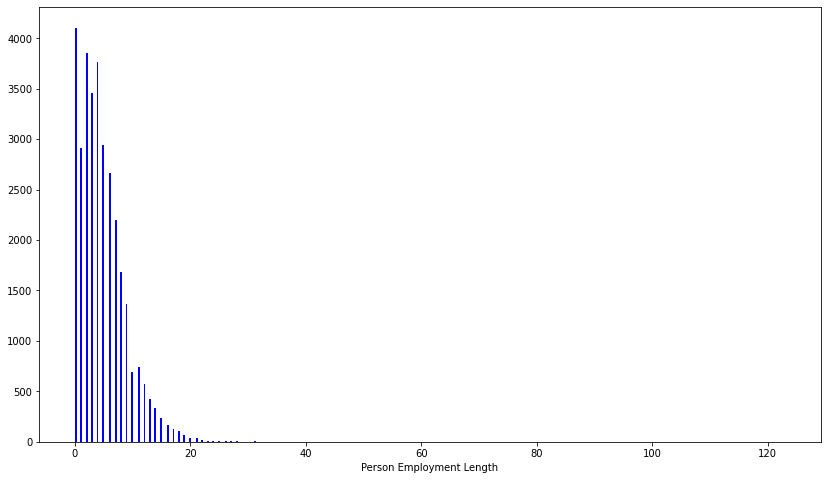

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cr_loan = pd.read_csv('cr_loan2.csv')

# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
display(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

You can use several different functions like` mean()` and `median()` to replace missing data. 

### ***Removing missing data***

You replaced missing data in `person_emp_length`, but in the previous exercise you saw that `loan_int_rate` has missing data as well.

Similar to having missing data within `loan_status`, having missing data within `loan_int_rate` will make predictions difficult.

Because interest rates are set by your company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but you cannot know for sure. For now, it's best to `.drop()` these records before moving forward.

* Print the number of records that contain missing data for `interest rate`.
* Create an array of indices for rows that contain missing interest rate called `indices`.
* Drop the records with missing interest rate data and save the results to `cr_loan_clean`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cr_loan = pd.read_csv('cr_loan2.csv')

# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


### ***Missing data intuition***

Here's an intuition check! When handling missing data, you have three options: keep, replace, and remove.

You've been looking at numeric columns, but what about a non-numeric column? How would you handle missing data in the column `person_home_ownership` which has string values?



In [ ]:
import pandas as pd

cr_loan = pd.read_csv('cr_loan2.csv')

cr_loan['person_home_ownership'].value_counts()  # << Suppose there are missing

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Replacing missing with **OTHER** is the correct way

# ***Logistic regression basics***

You've now cleaned up the data and created the new data set `cr_loan_clean`.

Think back to the final scatter plot from chapter 1 which showed more defaults with high `loan_int_rate`. Interest rates are easy to understand, but what how useful are they for predicting the probability of default?

Since you haven't tried predicting the probability of default yet, test out creating and training a logistic regression model with just `loan_int_rate`. Also check the model's internal parameters, which are like settings, to see the structure of the model with this one column.

* Create the `X` and `y` sets using the `loan_int_rate` and `loan_status` columns.
* Create and `fit` a logistic regression model to the training data and call it `clf_logistic_single`.
* Print the parameters of the model with **`.get_params()`**.
* Check the intercept of the model with the **`.intercept_`** attribute.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

display(y.head())
display(np.ravel(y.head())) # <<<< This makes label into one dimension
display(y.head().values) # <<< This yields 2 dimensions

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

,loan_status
0,0
1,1
2,1
3,1
4,1


array([0, 1, 1, 1, 1])

array([[0],
       [1],
       [1],
       [1],
       [1]])

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


Notice that the model was able to fit to the data, and establish some parameters internally. It's even produced an **`.intercept_`** value. What if you use more than one column?

### ***Multivariate logistic regression***

Generally, you won't use only `loan_int_rate` to predict the probability of default. You will want to use all the data you have to make predictions.

With this in mind, try training a new model with different columns, called `features`, from the `cr_loan_clean` data. Will this model differ from the first one? For this, you can easily check the `.intercept_` of the logistic regression. Remember that this is the y-intercept of the function and the overall log-odds of non-default.


* Create a new `X` data set with `loan_int_rate` and `person_emp_length`. Store it as `X_multi`.
* Create a `y` data set with just `loan_status`.
* Create and `.fit()` a `LogisticRegression()` model on the new `X` data. Store it as `clf_logistic_multi`.
* Print the `.intercept_` value of the model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate', 'person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


Take a closer look at each model's **`.intercept_`** value. The values have changed! The new `clf_logistic_multi` model has an **`.intercept_`** value closer to zero. This means the ***log odds of a non-default*** is approaching zero.

### ***Creating training and test sets***

You've just trained **`LogisticRegression()`** models on different columns.

You know that the data should be separated into training and test sets. **`test_train_split()`** is used to create both at the same time. The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, you have no way to tell how well it will perform on new loan data.

In addition to the **`intercept_`**, which is an attribute of the model, **`LogisticRegression()`** models also have the .**`coef_`** attribute. This shows how important each training column is for predicting the probability of default.

The data set `cr_loan_clean` is already loaded in the workspace.

* Create the data set `X` using 
  * interest rate, 
  * employment length, and 
  * income. 
* Create the `y` set using loan status.
* Use **`train_test_split()`** to create the training and test sets from `X` and `y`.
* Create and train a **`LogisticRegression()`** model and store it as `clf_logistic`.
* Print the coefficients of the model using **`.coef_`**.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)
print(['loan_int_rate','person_emp_length','person_income'])

# Print the models intercept
print(clf_logistic.intercept_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]
['loan_int_rate', 'person_emp_length', 'person_income']
[-3.30582292e-10]


Do you see that three columns were used for training and there are three values in **`.coef_`**? This tells you how important each column, or feature, was for predicting. The more positive the value, the more it predicts defaults. Look at the value for `loan_int_rate`.

$$Prob(loan\_status=1) = \frac{1}{1+\exp(-(-3.3e^{-10} + 1.29e^{-9}\times Int\_Rate -2.28e^{-9}\times Emp\_Length -2.17e^{-5}\times Income))}$$

# ***Interpreting coefficients***

ยกตัวอย่าง logit ตัวแปรเดียว
* สมมติมี จุดตัดแกนตั้งเท่ากับ -1.02
* ค่าสัมประสิทธิ์หน้าตัวแปร `person_emp_length` เป็น -0.056

จะมีความน่าจะเป็นในการชักดาบเท่ากับเท่าไหร่บ้าง ตามค่าของ ที่แตกต่างกัน 

$$Prob(loan\_status=1) = \frac{1}{1+\exp(-(-1.02 -0.056 \times \texttt{person_emp_length}))}$$

In [ ]:
import numpy as np

for emp_length in range(10, 13):
    print(f'person_emp_length = {emp_length} and probability of default = {1/(1+np.exp(-(-1.02 - 0.056*emp_length))):,.3f}')

person_emp_length = 10 and probability of default = 0.171
person_emp_length = 11 and probability of default = 0.163
person_emp_length = 12 and probability of default = 0.156


สามารถแปลผลได้ว่า เมื่อระยะเวลาในการจ้างงานเพิ่มขึ้น จะทำให้ควาวมน่าจะเป็นในการชักดาบลดลง

# ***Using non-numeric columns***

## ***One-hot encoding***

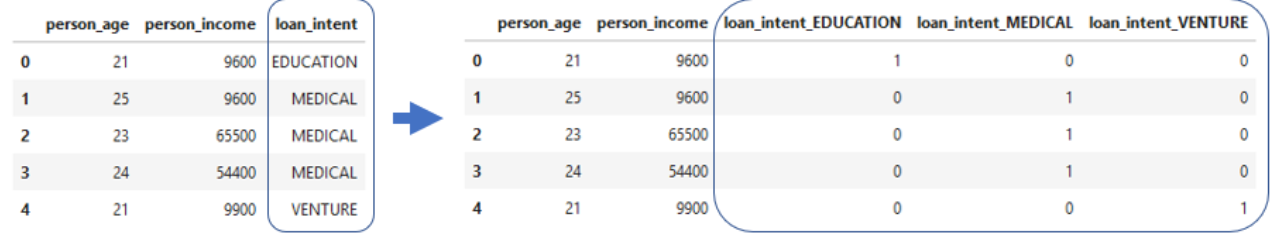

### ***Changing coefficients***


With this understanding of the coefficients of a **`LogisticRegression()`** model, have a closer look at them to see how they change depending on what columns are used for training. Will the column coefficients change from model to model?

You should **`.fit()`** two different **`LogisticRegression()`** models on different groups of columns to check. You should also consider what the potential impact on the probability of default might be.

The data set `cr_loan_clean` has already been loaded into the workspace along with the training sets `X1_train`, `X2_train`, and `y_train`.


* Check the first five rows of both `X` training sets.
* Train a logistic regression model, called `clf_logistic1`, with the `X1` training set.
* Train a logistic regression model, called `clf_logistic2`, with the `X2` training set.
* Print the coefficients for both logistic regression models.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create the X and y data sets
X1 = cr_loan_clean[['person_income', 'person_emp_length', 'loan_amnt']]
X2 = cr_loan_clean[['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

################################################################################
################################################################################

# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       person_income  person_emp_length  loan_amnt
22105          72000                  3       9000
2296           21000                  2       3000
14465           4800                  0       1200
6311           92000                  0       6000
12541          96000                  1       7000
       person_income  loan_percent_income  cb_person_cred_hist_length
22105          72000                 0.13                           6
2296           21000                 0.14                           2
14465           4800                 0.25                           2
6311           92000                 0.07                           3
12541          96000                 0.07                           4
[[-4.02643517e-05 -3.06659219e-08  1.06277246e-04]]
[[-2.17213449e-05  5.29012401e-10 -2.80735543e-09]]


Notice that the coefficient for the `person_income` changed when we changed the data from `X1` to `X2`. This is a reason to keep most of the data, because the models will learn differently depending on what data they're given.

### ***One-hot encoding credit data***

It's time to prepare the non-numeric columns so they can be added to your **`LogisticRegression()`** model.

Once the new columns have been created using one-hot encoding, you can concatenate them with the numeric columns to create a new data frame which will be used throughout the rest of the course for predicting probability of default.

Remember to ***only one-hot encode the non-numeric columns***. Doing this to the numeric columns would create an incredibly wide data set!

The credit loan data, `cr_loan_clean`, has already been loaded in the workspace.

* Create a data set for all the numeric columns called `cred_num` and one for the non-numeric columns called `cred_str`.
* Use one-hot encoding on `cred_str` to create a new data set called `cred_str_onehot`.
* Union `cred_num` with the new one-hot encoded data and store the results as `cr_loan_prep`.
* Print the columns of the new data set.

In [ ]:
import pandas as pd

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)
cr_loan_prep.head()

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


### ***Predicting probability of default***

All of the data processing is complete and it's time to begin creating predictions for probability of default. You want to train a **`LogisticRegression()`** model on the data, and examine how it predicts the probability of default.

So that you can better grasp what the model produces with `predict_proba`, you should look at an example record alongside the predicted probability of default. How do the first five predictions look against the actual values of `loan_status`?

The data set `cr_loan_prep` along with `X_train`, `X_test`, `y_train`, and `y_test` have already been loaded in the workspace.

* Train a logistic regression model on the training data and store it as `clf_logistic`.
* Use `predict_proba()` on the test data to create the predictions and store them in `preds`.
* Create two data frames, `preds_df` and `true_df`, to store the first five predictions and true `loan_status` values.
* Print the `true_df` and `preds_df` as one set using `.concat()`.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)


# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
display(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

,loan_status,prob_default
0,1,0.445779
1,1,0.223447
2,0,0.288558
3,0,0.169358
4,1,0.114182


We have some predictions now, but they ***don't look very accurate***, do they? It looks like most of the rows with `loan_status` at `1` have a low probability of default. How good are the rest of the predictions? Next, let's see if we can determine how accurate the entire model is.

# ***Model accuracy scoring***

$$Accuracy = \frac{\text{Number of Correct Predictions}}{\text{Number of Predictions}}$$

In [ ]:
clf_logistic.score(X_test, y_test)

0.8025288526816021

* 80% of values for loan_status predicted correctly.

# **<ins>R</ins>eceiver <ins>O</ins>perating <ins>C</ins>haracteristic (ROC) Curve** 

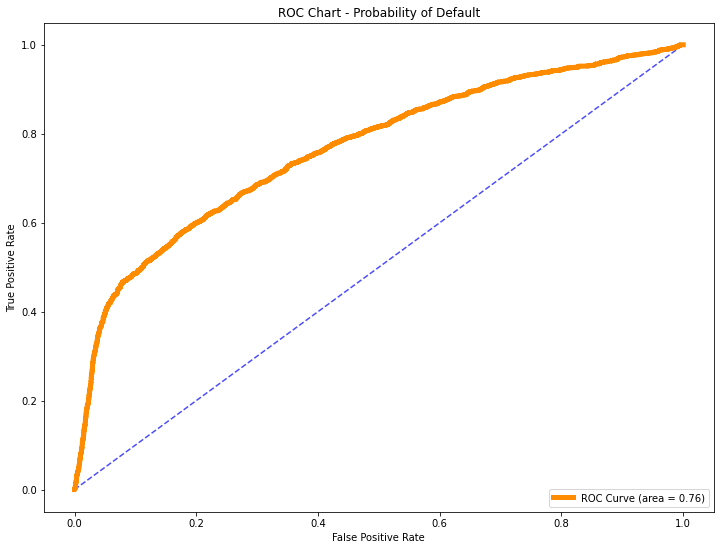

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from numpy import linspace

fallout, sensitivity, thresholds = roc_curve(y_test, clf_logistic.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,9))
plt.plot(linspace(0,1,100), linspace(0,1,100), color='blue', alpha=0.7, linestyle='--')
plt.plot(fallout, sensitivity, color = 'darkorange', linewidth=5, label='ROC Curve (area = 0.76)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart - Probability of Default')
plt.legend(loc='lower right')
plt.show()

* เส้นประสีฟ้า แสดงถึงการพยากรณ์แบบมั่วๆ
* เส้นสีส้ม แสดงถึงการพยากรณ์จากแบบจำลอง

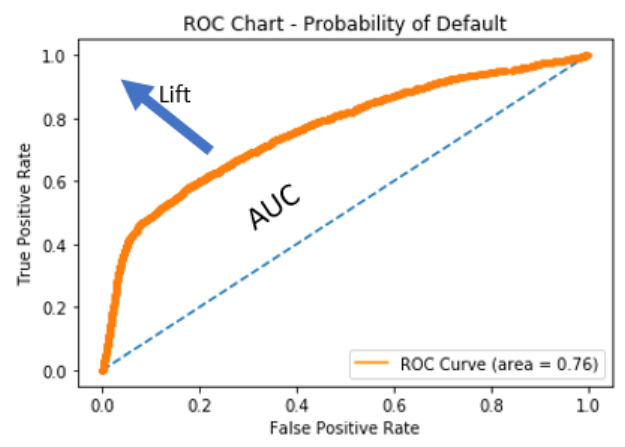

ยิ่งพื้นที่ AUC เยอะ ยิ่งดี

# ***Setting the Threshold***
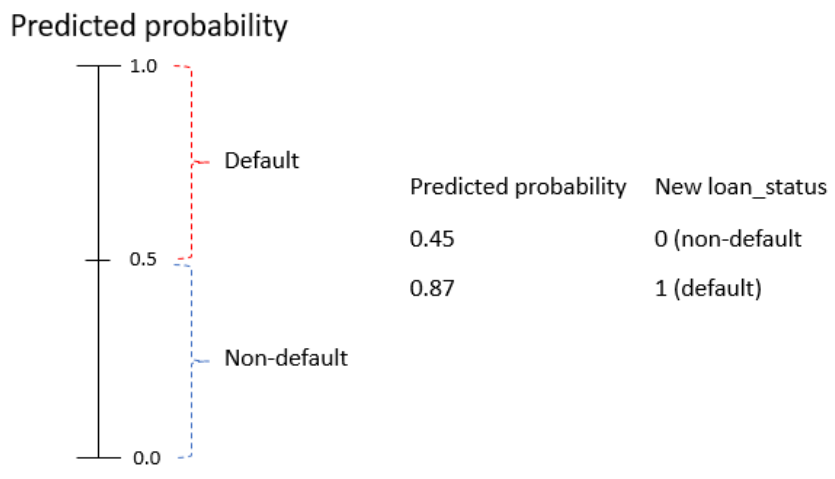

In [ ]:
preds_df = pd.DataFrame(clf_logistic.predict_proba(X_test)[:,1], columns=['prob_default'])
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
preds_df.iloc[11779:11784]

,prob_default,loan_status
11779,0.079626,0
11780,0.051979,0
11781,0.522450,1
11782,0.370478,0
11783,0.123786,0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds_df['loan_status'], target_names=['Non-Default', 'Default']))


              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



(array([0.80742729, 0.71264368]),
 array([0.98097412, 0.16782676]),
 array([0.8857802 , 0.27167449]),
 array([9198, 2586]))

## **Select and store specific components from the `classification_report()`**

สมมติต้องการ ค่าใน Default - recall

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

display(precision_recall_fscore_support(y_test,preds_df['loan_status']))
print('\n', precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])

(array([0.80742729, 0.71264368]),
 array([0.98097412, 0.16782676]),
 array([0.8857802 , 0.27167449]),
 array([9198, 2586]))


 0.16782675947409126


### ***Default classification reporting***

Here is where setting the threshold for probability of default will help you analyze the model's performance through classification reporting.

Creating a data frame of the probabilities makes them easier to work with. Apply the threshold to the data and check the value counts for both classes of `loan_status` to see how many predictions of each are being created. This will help with insight into the scores from the classification report.

The `cr_loan_prep` data set, trained logistic regression `clf_logistic`, true loan status values `y_test`, and predicted probabilities, `preds` are loaded in the workspace.

* Create a data frame of just the probabilities of default from `preds` called `preds_df`.
* Reassign loan_status values based on a threshold of `0.50` for probability of default in `preds_df`.
* Print the value counts of the number of rows for each `loan_status`.
* Print the classification report using `y_test` and `preds_df`.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
from sklearn.metrics import classification_report

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

################################################################################
################################################################################

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11175
1      609
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



It looks like almost all of our test set was predicted to be non-default. The recall for defaults is `0.17` meaning `17%` of our true defaults were predicted correctly.

### ***Selecting report metrics***

The **`classification_report()`** has many different metrics within it, but you may not always want to print out the full report. Sometimes you just want specific values to compare models or use for other purposes.

There is a function within `scikit-learn` that pulls out the values for you. That function is **`precision_recall_fscore_support()`** and it takes in the same parameters as `classification_report`.

```
# Import function
from sklearn.metrics import precision_recall_fscore_support

# Select all non-averaged values from the report
precision_recall_fscore_support(y_true,predicted_values)
```

The `cr_loan_prep` data set along with the predictions in `preds_df` have already been loaded in the workspace.

* Print the classification report for `y_test` and predicted loan status.
* Print all the non-average values using **`precision_recall_fscore_support()`**.
* Print only the first two values from the report by subsetting the string with `[]`.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

################################################################################
################################################################################

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586]))
[0.80742729 0.71264368]


Now we know how to pull out specific values from the report to either store later for comparison, or use to check against portfolio performance. Remember the impact of recall for defaults? This way, you can store that value for later calculations.

### ***Visually scoring credit models***

Now, you want to visualize the performance of the model. In ROC charts, the X and Y axes are two metrics you've already looked at: the false positive rate (`fall-out`), and the true positive rate (`sensitivity`).

You can create an ROC chart of it's performance with the following code:

```
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity)
```

To calculate the AUC score, you use **`roc_auc_score()`**.

The credit data `cr_loan_prep` along with the data sets `X_test` and `y_test` have all been loaded into the workspace. A trained `LogisticRegression()` model named `clf_logistic` has also been loaded into the workspace.

* Create a set of predictions for probability of default and store them in `preds`.
* Print the accuracy score the model on the `X` and `y` test sets.
* Use `roc_curve()` on the test data and probabilities of default to create `fallout` and `sensitivity` Then, create a ROC curve plot with `fallout` on the x-axis.
* Compute the AUC of the model using test data and probabilities of default and store it in `auc`.

0.8025288526816021


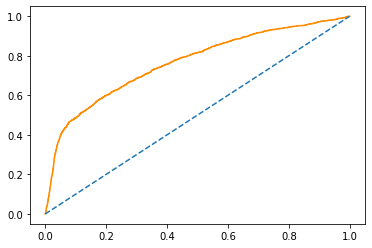

0.7643248801355148


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

###############################################################################
###############################################################################
###############################################################################

# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)
print(auc)

So the accuracy for this model is about `80%` and the AUC score is `76%`. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (`fallout`) and true positive rate (`sensitivity`).

# ***Confusion Matrix***

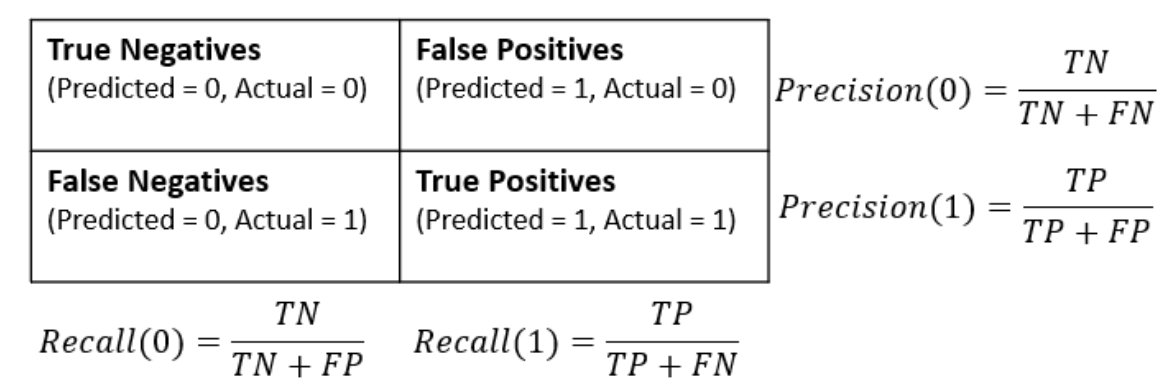

จากผลลัพธ์ในแบบฝึกหัดด้านบนจะเห็นว่า Recall(1) (Default) = 0.17 นั่นคือ ทำนายการชักดาบถูกแค่ 17% แต่ทำนายว่า ไม่ชัก แต่จริงๆแล้วชัก (คือทำนายผิด) ถึง 83%

# ***ACCURACY SCORE from Confusion Matrix***
$$Accuracy = \frac{TN+TP}{TN+TP+FN+FP}$$

### ***Thresholds and confusion matrices***

You've looked at setting thresholds for defaults, but how does this impact overall performance? To do this, you can start by looking at the effects with confusion matrices.

Set different values for the threshold on probability of default, and use a confusion matrix to see how the changing values affect the model's performance.

The data frame of predictions, `preds_df`, as well as the model `clf_logistic` have been loaded in the workspace.

* Reassign values of `loan_status` using a threshold of `0.5` for probability of default within `preds_df`.
* Print the confusion matrix of the `y_test` data and the new loan status values.
*  Reassign values of `loan_status` using a threshold of `0.4` for probability of default within `preds_df`.
* Print the confusion matrix of the `y_test` data and the new loan status values.



In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

################################################################################
################################################################################

# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
a = confusion_matrix(y_test,preds_df['loan_status'])
print(confusion_matrix(y_test,preds_df['loan_status']))

# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
b = confusion_matrix(y_test,preds_df['loan_status'])
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9023  175]
 [2152  434]]
[[8476  722]
 [1386 1200]]


Based on the confusion matrices you just created, calculate the default recall for each. Using these values, answer the following: which threshold gives us the highest value for default recall?

In [ ]:
print(f'For threshold = 0.5, default recall = {a[1,1]/sum(a[1][:]):,.2f}')
print(f'For threshold = 0.4, default recall = {b[1,1]/sum(b[1][:]):,.2f}')

For threshold = 0.5, default recall = 0.17
For threshold = 0.4, default recall = 0.46


The value for default recall at threshold = `0.4` is actually pretty high! You can check out the non-default recalls as well to see how the threshold affected those values.

### ***How thresholds affect performance***

Setting the threshold to `0.4` shows promising results for model evaluation. Now you can assess the financial impact using the default recall which is selected from the classification reporting using the function **`precision_recall_fscore_support()`**.

For this, you will estimate the amount of unexpected loss ***using the default recall to find what proportion of defaults you did not catch*** with the new threshold. This will be a dollar amount which tells you how much in losses you would have if all the unfound defaults were to default all at once.

The average loan value, `avg_loan_amnt` has been calculated and made available in the workspace along with `preds_df` and `y_test`.


* Reassign the `loan_status` values using the threshold `0.4`.
* Store the number of defaults in `preds_df` by selecting the second value from the value counts and store it as `num_defaults`.
* Get the default recall rate from the classification matrix and store it as `default_recall`
* Estimate the unexpected loss from the new default recall by multiplying `1 - default_recall` by the average loan amount and number of default loans.

In [16]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')
avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

#############################################################################
#############################################################################

# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(f'Unexpected loss from the new default recall = {num_defaults * avg_loan_amnt * (1 - default_recall):,.2f}')

Unexpected loss from the new default recall = 9,872,265.22


By our estimates, this loss would be around `$9.8` million. That seems like a lot! Try rerunning this code with threshold values of `0.3` and `0.5`. Do you see the estimated losses changing? How do we find a good threshold value based on these metrics alone?

### ***Threshold selection***

You know there is a trade off between metrics like ***default recall***, ***non-default recall***, and ***model accuracy***. One easy way to approximate a good starting threshold value is to look at a plot of all three using `matplotlib`. With this graph, you can see how each of these metrics look as you change the threshold values and find the point at which the performance of all three is good enough to use for the credit data.

The threshold values `thresh`, default recall values `def_recalls`, the non-default recall values `nondef_recalls` and the accuracy scores `accs` have been loaded into the workspace. To make the plot easier to read, the array `ticks` for x-axis tick marks has been loaded as well.


* Plot the graph of `thresh` for the x-axis then `def_recalls`, non-default recall values, and accuracy scores on each y-axis.

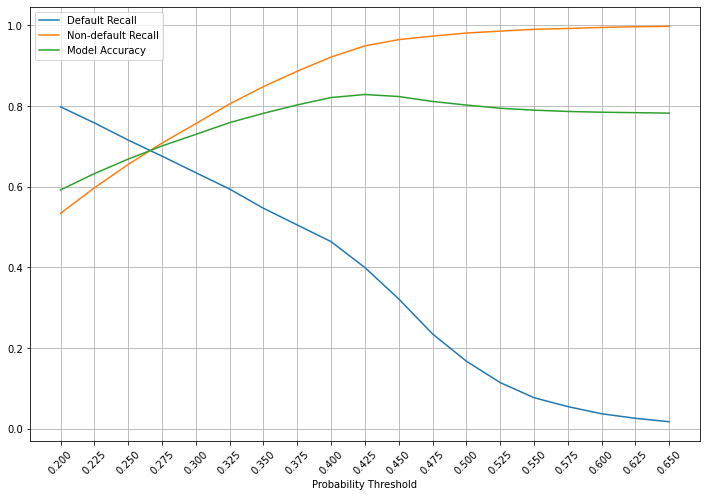

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
import matplotlib.pyplot as plt

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

###############################################################################
##            เตรียมค่าข้อมูของ thresh, def_recalls, nondef_calls, ticks         ##
###############################################################################
thresh, ticks = np.linspace(0.2, 0.65, 19), np.linspace(0.2, 0.65, 19)
def_recalls, nondef_recalls, accs = [], [], []

for i in thresh:
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > i else 0)
    def_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][0])
    c = confusion_matrix(y_test,preds_df['loan_status'])
    accs.append((c[0,0]+c[1,1])/sum(sum(c)))  # <<< จากข้างบน ใช้ clf_logistic.score ซึ่งใช้ไม่ได้ ต้องคำนวณเองจากนิยามของ accuracy score

###############################################################################
###############################################################################
plt.figure(figsize=(12,8))
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks, rotation=45)
plt.grid()
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

Think about the threshold values from `thresh` and how they affect each of these three metrics. Approximately what starting threshold value would maximize these scores evenly?

<ins>**Answer**</ins>:

The point **<ins>where all three lines converge</ins>** (approximately 0.2625). This threshold would make a great starting point, but declaring all loans about 0.2625 to be a default is probably ***NOT*** practical.

# ***Decision Trees***

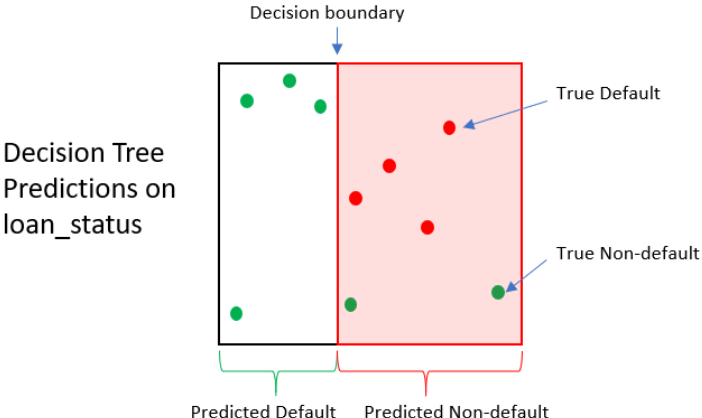

### ***The red shaded area is what model predicted as default*** คำอธิบายในรูปน่าจะผิด

* มีจุดสีเขียว 2 จุดใในพื้นที่แดง คือ จริงๆเป็น Non-default แต่ดันไปพยากรณ์ว่า default

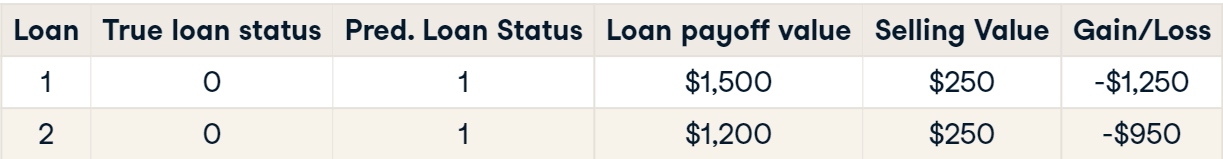

## ***A Forest of Trees***

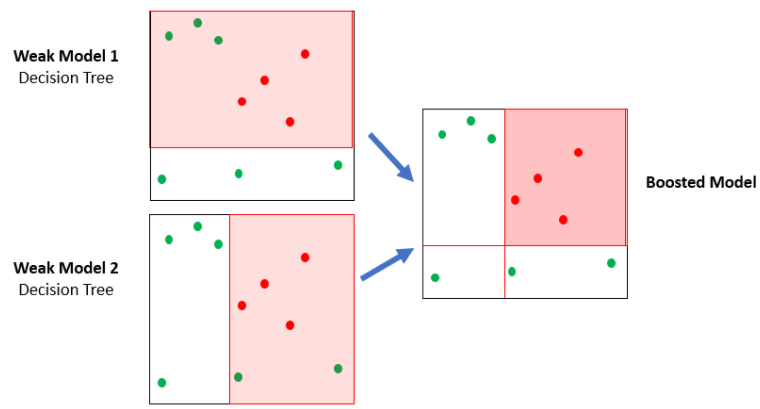

## ***Creating and Training Trees***



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create a logistic regression model
clf_logistic = LogisticRegression()
# Train the logistic regression
clf_logistic.fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns=['prob_default'])

# Create a gradient boosted tree model
clf_gbt = xgb.XGBClassifier()

# Train the gradient boosted tree
clf_gbt.fit(X_train,np.ravel(y_train))

# Predict probabilities of default
gbt_preds_prob = clf_gbt.predict_proba(X_test)

# Predict loan_status as a 1 or 0
gbt_preds = clf_gbt.predict(X_test)

display(gbt_preds_prob[:5])
display(gbt_preds[:5])  

array([[0.05956489, 0.9404351 ],
       [0.07798618, 0.9220138 ],
       [0.9782927 , 0.02170731],
       [0.9735166 , 0.02648344],
       [0.9351966 , 0.06480343]], dtype=float32)

array([1, 1, 0, 0, 0])

### ***Trees for defaults***

You will now train a gradient boosted tree model on the credit data, and see a sample of some of the predictions. Do you remember when you first looked at the predictions of the logistic regression model? They didn't look good. Do you think this model be different?

The credit data `cr_loan_prep`, the training sets `X_train` and `y_train`, and the test data `X_test` is available in the workspace. The XGBoost package is loaded as `xgb`.


* Create and train a gradient boosted tree using `XGBClassifier()` and name it `clf_gbt`.
* Predict probabilities of default on the test data and store the results in `gbt_preds`.
* Create two data frames, `preds_df` and `true_df`, to store the first five predictions and true `loan_status` values.
* Concatenate and print the data frames `true_df` and `preds_df` in order, and check the model's results.

In [20]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

###############################################################################
###############################################################################

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns=['prob_default'])
true_df  = y_test.head()

# Concatenate and print the two data frames for comparison
display(pd.concat([true_df.reset_index(drop=True), preds_df], axis=1))

,loan_status,prob_default
0,1,0.940435
1,1,0.922014
2,0,0.021707
3,0,0.026483
4,1,0.064803


The predictions don't look the same as with the `LogisticRegression()` below, do they? 
```
loan_status	prob_default
1	          0.445779
1	          0.223447
0	          0.288558
0	          0.169358
1	          0.114182
```
Notice that this model is already accurately predicting the probability of default for some loans with a true value of 1 in `loan_status`.

### ***Gradient boosted portfolio performance***

At this point you've looked at predicting probability of default using both a `LogisticRegression()` and `XGBClassifier()`. You've looked at some scoring and have seen samples of the predictions, but what is the overall affect on portfolio performance? Try using expected loss as a scenario to express the importance of testing different models.

A data frame called `portfolio` has been created to combine the probabilities of default for both models, the loss given default (assume 20% for now), and the `loan_amnt` which will be assumed to be the exposure at default.

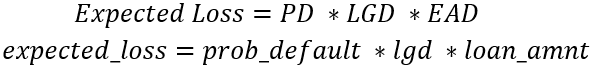


* Print the first five rows of `portfolio`.
* Create the `expected_loss` column for the `gbt` and `lr`  model named `gbt_expected_loss` and `lr_expected_loss`.
* Print the sum of `lr_expected_loss` for the entire `portfolio`.
* Print the sum of `gbt_expected_loss` for the entire `portfolio`.


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
lr_preds = clf_logistic.predict_proba(X_test)

# Prepare for concatenation
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns=['gbt_prob_default'])
lr_preds_df = pd.DataFrame(lr_preds[:,1], columns=['lr_prob_default'])
lgd = pd.DataFrame(data=[0.2]*len(X_test), columns=['lgd'])
loan_amnt = X_test['loan_amnt'].reset_index(drop=True)

portfolio = pd.concat([gbt_preds_df, lr_preds_df, lgd, loan_amnt], axis=1)

###############################################################################
###############################################################################

# Print the first five rows of the portfolio data frame
display(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print(f'LR expected loss: {np.sum(portfolio["lr_expected_loss"]):,.2f}')

# Print the sum of the expected loss for gbt
print(f'GBT expected loss: {np.sum(portfolio["gbt_expected_loss"]):,.2f}')


,gbt_prob_default,lr_prob_default,lgd,loan_amnt
0,0.940435,0.445779,0.2,15000
1,0.922014,0.223447,0.2,11200
2,0.021707,0.288558,0.2,15000
3,0.026483,0.169358,0.2,10800
4,0.064803,0.114182,0.2,3000


LR expected loss: 5,596,776.98
GBT expected loss: 5,447,712.94


The total expected loss for the **`XGBClassifier()`** model is quite a bit lower. When we talk about accuracy and precision, ***the goal is to generate models which have a low expected loss***. Looking at a `classification_report()` helps as well.

### ***Assessing gradient boosted trees***

So you've now used `XGBClassifier()` models to predict probability of default. These models can also use the `.predict()` method for creating predictions that give the actual class for `loan_status`.

You should check the model's initial performance by looking at the metrics from the `classification_report()`. Keep in mind that you have not set thresholds for these models yet.

* Predict the `loan_status` values for the `X` test data and store them in `gbt_preds`.
* Check the contents of `gbt_preds` to see predicted `loan_status` values not probabilities of default.
* Print a **`classification_report()`** of the model's performance against `y_test`.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
lr_preds = clf_logistic.predict(X_test)
target_names = ['Non-Default', 'Default']
print("CLASSIFICATION REPORT FOR LOGISTIC REGRESSION")
print(classification_report(y_test, lr_preds, target_names=target_names))

###############################################################################
###############################################################################

# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print("\n\nCLASSIFICATION REPORT FOR XGBOOST")
print(classification_report(y_test, gbt_preds, target_names=target_names))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784

[1 1 0 ... 0 0 0]


CLASSIFICATION REPORT FOR XGBOOST
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9198
     Default       0.93      0.69      0.80      2586

    accuracy                           0.92     11784
   macro avg       0.93      0.84      0.87     11784
weighted avg       0.92      0.92      0.92     11784



Have a look at the precision and **recall** scores! Remember the low default recall values we were getting from the **`LogisticRegression()`**? This model already appears to have serious potential.

# ***Column Selection for Credit Risk***

* บางทีการใช้ข้อมูลจากทุกคอลัมน์ อาจจะไม่ได้เป็นผลดีเสมอไป
* ใน Logit เราดูจากขนาดและนัยสำคัญของค่าสัมประสิทธิ์

## ***การเลือกตัวแปร (คอลัมน์) สำหรับ Gradient Boosted Trees***

* Use the **`.get_booster()`** and **`.get_score()`** methods

In [ ]:
# Print the feature importances
clf_gbt.get_booster().get_score(importance_type = 'weight')

{'cb_person_cred_hist_length': 2,
 'loan_amnt': 12,
 'loan_grade_B': 1,
 'loan_grade_C': 14,
 'loan_grade_D': 35,
 'loan_grade_E': 21,
 'loan_grade_F': 7,
 'loan_grade_G': 15,
 'loan_int_rate': 101,
 'loan_intent_DEBTCONSOLIDATION': 23,
 'loan_intent_EDUCATION': 4,
 'loan_intent_HOMEIMPROVEMENT': 19,
 'loan_intent_MEDICAL': 27,
 'loan_intent_PERSONAL': 4,
 'loan_intent_VENTURE': 16,
 'loan_percent_income': 72,
 'person_age': 12,
 'person_emp_length': 24,
 'person_home_ownership_MORTGAGE': 5,
 'person_home_ownership_OWN': 45,
 'person_home_ownership_RENT': 40,
 'person_income': 140}

ข้างบนที่เห็นนี้ เป็น ดิกชันนารี ที่มีชื่อคอลัมน์และค่าน้ำหนักแสดงความสำคัญ

## ***Plotting Column Importances***

* Use the **`plot_importance()`** function

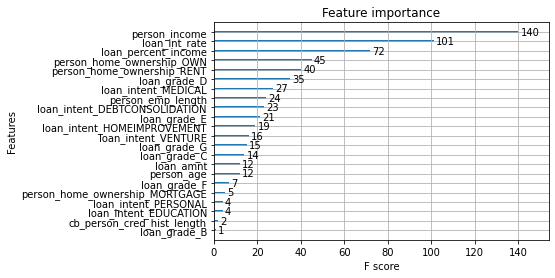

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(clf_gbt, importance_type='weight')
plt.show()

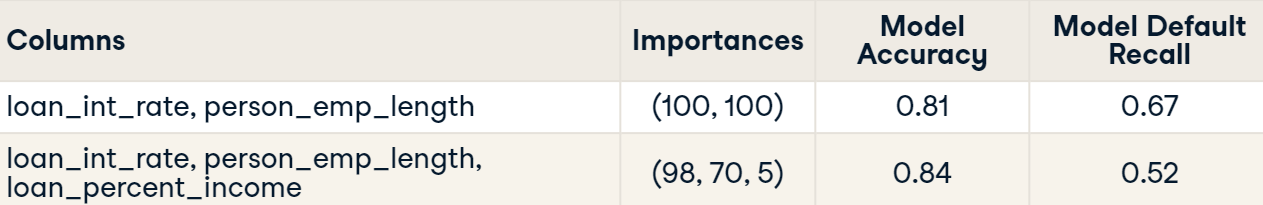

บางครั้ง การเพิ่มตัวแปรทำให้ค่า Accuracy สูงขึ้นจริง แต่ไปลดค่าอื่นๆ เช่น ค่า default recall (ทำให้พยากรณ์ผิดไปเยอะว่า ไม่ชักดาบ แต่จริงๆดันชักดาบ)

* บางครั้ง คะแนน accuracy กับ recall มันก็ไม่ไปในทางเดียวกัน

# ***F1 scoring for models***

* **F1 score** is a single metric used to look at both **accuracy** and **recall**

$$F1 \ Score = 2\times\frac{precision \times recall}{precision + recall}$$

In [ ]:
print("CLASSIFICATION REPORT FOR XGBOOST\n\n")
print(classification_report(y_test, gbt_preds, target_names=['Non-Default', 'Default']))

CLASSIFICATION REPORT FOR XGBOOST


              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9198
     Default       0.93      0.69      0.80      2586

    accuracy                           0.92     11784
   macro avg       0.93      0.84      0.87     11784
weighted avg       0.92      0.92      0.92     11784



### ***Column importance and default prediction***

When using multiple training sets with many different groups of columns, it's important to keep and eye on which columns matter and which do not. It can be expensive or time-consuming to maintain a set of columns even though they might not have any impact on `loan_status`.

The `X` data for this exercise was created with the following code:

```
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
```

Train an **`XGBClassifier()`** model on this data, and check the column importance to see how each one performs to predict `loan_status`.

* Create and train a **`XGBClassifier()`** model on the `X_train` and `y_train` training sets and store it as `clf_gbt`.
* Print the column importances for the columns in `clf_gbt` by using **`.get_booster()`** and **`.get_score()`**.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

################################################################################
################################################################################

# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
clf_gbt.get_booster().get_score(importance_type='weight')

{'loan_amnt': 47,
 'loan_grade_F': 6,
 'loan_int_rate': 183,
 'loan_percent_income': 121,
 'person_home_ownership_MORTGAGE': 39,
 'person_income': 278}

So, the importance for `loan_grade_F` is only `6` in this case. This could be because there are so few of the F-grade loans. While the F-grade loans don't add much to predictions here, *they <ins>might affect the importance of other training</ins> columns*.

### ***Visualizing column importance***

When the model is trained on different sets of columns it changes the performance, but does the importance for the same column change depending on which group it's in?

The data sets `X2` and `X3` have been created with the following code:

```
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]
```

Understanding how different columns are used to arrive at a `loan_status` prediction is very important for model interpretability.

* Create and train an **`XGBClassifier()`** model on `X2_train` and call it `clf_gbt2`.
* Plot the column importances for the columns that `clf_gbt2` trained on.
* Create and train another **`XGBClassifier()`** model on `X3_train` and call it `clf_gbt3`.
* Plot the column importances for the columns that `clf_gbt3` trained on.

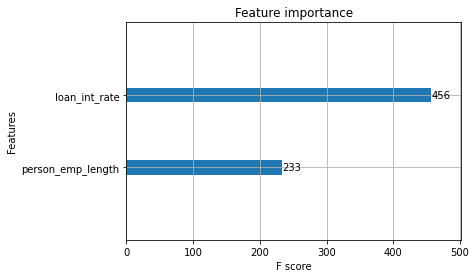

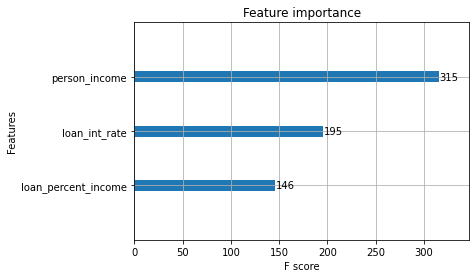

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X2 = cr_loan_clean[['loan_int_rate','person_emp_length']]
X3 = cr_loan_clean[['person_income','loan_int_rate','loan_percent_income']]
y = cr_loan_clean[['loan_status']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=.4, random_state=123)

################################################################################
################################################################################

# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type='weight')
plt.show()

# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type='weight')
plt.show()

Did you notice that the importance of `loan_int_rate` went from `456` to `195`? Initially, this was the most important column, but `person_income` ended up taking the top spot here.

### ***Column selection and model performance***

Creating the training set from different combinations of columns affects the model and the importance values of the columns. Does a different selection of columns also affect the F-1 scores, the combination of the precision and recall, of the model? You can answer this question by training two different models on two different sets of columns, and checking the performance.

Inaccurately predicting defaults as non-default can result in unexpected losses if the probability of default for these loans was very low. You can use the F-1 score for defaults to see how the models will accurately predict the defaults.

* Use both `gbt` and `gbt2` to predict `loan_status` and store the values in `gbt_preds` and `gbt2_preds`.
* Print the **`classification_report()`** of the first model.
* Print the **`classification_report()`** of the second model.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X  = cr_loan_clean[['person_income', 'loan_int_rate', 'loan_percent_income', 'loan_amnt', 'person_home_ownership_MORTGAGE']]
X2 = cr_loan_clean[['person_income', 'loan_int_rate', 'loan_percent_income', 'person_emp_length', 'person_home_ownership_RENT']]
y = cr_loan_clean[['loan_status']]

# Create the X and y data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))
gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

################################################################################
################################################################################

# Predict the loan_status using each model
gbt_preds = gbt.predict(X_test)
gbt2_preds = gbt2.predict(X2_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))


              precision    recall  f1-score   support

 Non-Default       0.90      0.95      0.92      9198
     Default       0.79      0.61      0.69      2586

    accuracy                           0.88     11784
   macro avg       0.84      0.78      0.81     11784
weighted avg       0.87      0.88      0.87     11784

              precision    recall  f1-score   support

 Non-Default       0.90      0.98      0.94      9198
     Default       0.89      0.60      0.72      2586

    accuracy                           0.90     11784
   macro avg       0.89      0.79      0.83     11784
weighted avg       0.90      0.90      0.89     11784



Originally, it looked like the selection of columns affected model accuracy the most, but now we see that ***the selection of columns also affects recall*** by quite a bit.

### ***XGBoost Cross Validation***



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Set the number of folds
n_folds = 2

# Set early stopping number
early_stop = 5

# Set any specific parameters for cross validation
params = {'objective': 'binary:logistic',
          'seed': 99, 
          'eval_metric':'auc'}

# Restructure the train data for xgboost
DTrain = xgb.DMatrix(X_train, label=y_train)

# Perform cross validation
xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds, early_stopping_rounds=early_stop)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.899156,0.006293,0.880332,0.001206
1,0.908652,0.003859,0.894328,0.000670
2,0.913827,0.006305,0.899420,0.003815
3,0.921747,0.000812,0.905584,0.000979
4,0.925572,0.001045,0.908370,0.001398


ให้สังเกตว่า `train-auc-mean` และ `test-auc-mean` เพิ่มขึ้นเรื่อยๆเมื่อมีการ train เพิ่มขึ้นในแต่ละ fold

# ***Cross validation scoring***

* Uses cross validation and scoring metrics with **`cross_val_score()`**

In [ ]:
from sklearn.model_selection import cross_val_score

# Create a gbt model
xg = xgb.XGBClassifier(learning_rate=0.4, max_depth=10)

# Use cross valudation and accuracy scores 5 consecutive times
cross_val_score(gbt, X_train, np.ravel(y_train), cv=5)

array([0.93323904, 0.9241867 , 0.92022631, 0.92390382, 0.91739745])

### ***Cross validating credit models***

Credit loans and their data change over time, and it won't always look like what's been loaded into the current test sets. So, you can use cross-validation to try several smaller training and test sets which are derived from the original `X_train` and `y_train`.

Use the XGBoost function **`cv()`** to perform cross-validation. You will need to set up all the parameters for **`cv()`** to use on the test data.

* Set the number of folds to `5` and the stopping to `10`. Store them as `n_folds` and `early_stopping`.
* Create the matrix object `DTrain` using the training data.
* Use **`cv()`** on the parameters, folds, and early stopping objects. Store the results as `cv_df`.
* Print the contents of `cv_df`.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

###############################################################################
###############################################################################

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label=y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round=5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
display(cv_df)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.898182,0.001318,0.892519,0.004650
1,0.909256,0.002052,0.902780,0.005053
2,0.913621,0.002205,0.906834,0.004423
3,0.918600,0.001092,0.910779,0.005221
4,0.922251,0.001818,0.914193,0.004422


Do you see how the `AUC` for both **`train-auc-mean`** and **`test-auc-mean`** improves at each iteration of cross-validation? As the iterations progress the scores get better, but will they eventually reach `1.0`?

### ***Limits to cross-validation testing***

You can specify very large numbers for both **`nfold`** and **`num_boost_round`** if you want to perform an extreme amount of cross-validation. The data frame `cv_results_big` has already been loaded in the workspace and was created with the following code:

```
cv = xgb.cv(params, DTrain, num_boost_round=600, nfold=10,
            shuffle=True)
```

Here, **`cv()`** performed `600` iterations of cross-validation! The parameter **`shuffle`** tells the function to shuffle the records each time.

Have a look at this data to see what the `AUC` are, and check to see if they reach `1.0` using cross validation. You should also plot the test `AUC` score to see the progression.

* Print the first five rows of the CV results data frame.
* Print the average of the test set AUC from the CV results data frame rounded to two places.
* Plot a line plot of the test set AUC over the course of each iteration.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label=y_train)

cv = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10, shuffle = True)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.897568,0.000909,0.892900,0.008258
1,0.906985,0.002611,0.901162,0.007519
2,0.913678,0.001403,0.907910,0.007753
3,0.919123,0.000921,0.912130,0.007145
4,0.922864,0.001097,0.914962,0.006706


0.94


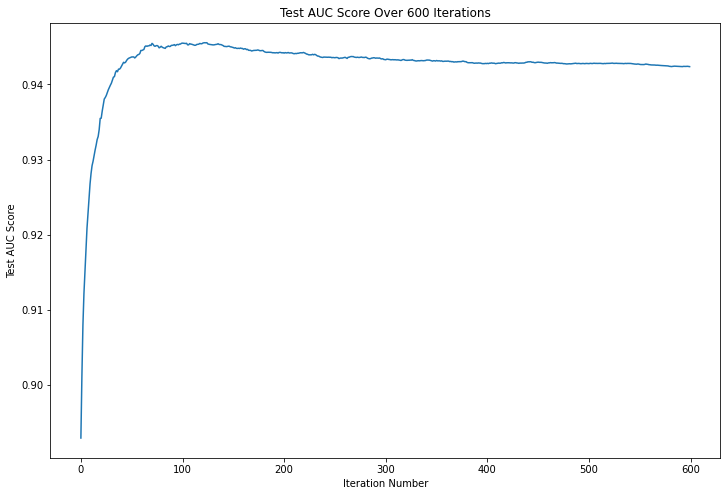

In [ ]:
import matplotlib.pyplot as plt

# Print the first five rows of the CV results data frame
display(cv.head())

# Calculate the mean of the test AUC scores
print(f"{np.mean(cv['test-auc-mean']):,.2f}")

# Plot the test AUC scores for each iteration
plt.figure(figsize=(12,8))
plt.plot(cv['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

Notice that the test AUC score never quite reaches `1.0` and begins to decrease slightly after `100` iterations. This is because this ***many cross-validations can actually cause the model to become overfit***. So, there is a limit to how much cross-validation you should to.

### ***Cross-validation scoring***

Now, you should use cross-validation scoring with **`cross_val_score()`** to check the overall performance.

This exercise presents an excellent opportunity to test out the use of the hyperparameters **`learning_rate`** and **`max_depth`**. Remember, hyperparameters are like settings which can help create optimum performance.

* Create a gradient boosted tree with a learning rate of `0.1` and a max depth of `7`. Store the model as `gbt`.
* Calculate the cross validation scores against the `X_train` and `y_train` data sets with `4` folds. Store the results as `cv_scores`.
* Print the cross validation scores.
* Print the average accuracy score and standard deviation with formatting.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

###############################################################################
###############################################################################

# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate=0.1, max_depth=7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv=4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.94048427 0.93256393 0.93324282 0.92462653]
Average accuracy: 0.93 (+/- 0.01)


With only a couple of hyperparameters and cross-validation, we can get the average accuracy up to 93%. This is a great way to validate how robust the model is.

# ***Imbalance Data***

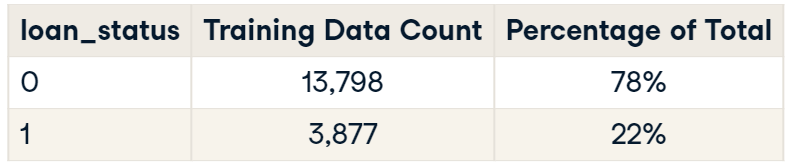

## ***MOdel Loss FUnction***

Minimize 

$$Log \ Loss = -\frac{1}{N}\sum_{i=1}^N\left[y_i\log(p_i)+(1-y_i)\log(1-p_i) \right]$$

## ***The cost of imbalance***

* An actual default predicted as non-default is much more costly than an actual non-default predicted to be default.

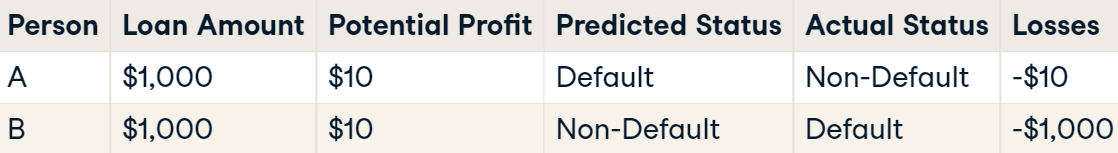

## ***Undersampling strategy***

Combine smaller random sample of non-defaults with defaults

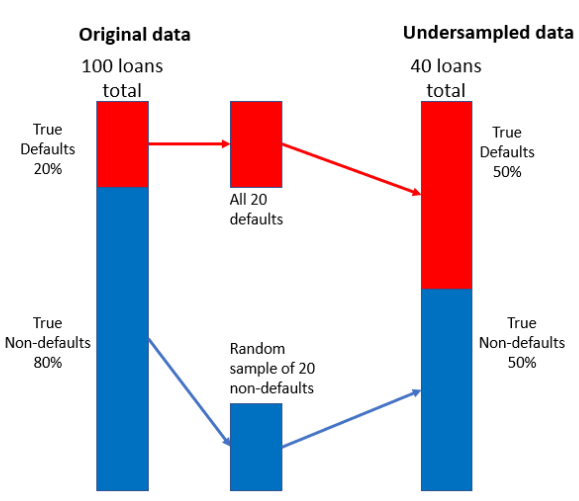

## ***Undersampling Steps***

1. เอา `X_train`, `y_train` กลับมารวมกันใหม่ด้วย **`pd.concat()`**

```
X_y_train = pd.concat([X_train.reset_index(drop=True),
y_train.reset_index(drop=True)], axis=1)
```
2. นับจำนวนที่ชักดาบ หรือไม่ชักดาบ

```
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
```

3. แยกชุดข้อมูลสำหรับกลุ่มที่ชักดาบ กับกลุ่มที่ไม่ชักดาบ ออกจากกัน

```
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]
```

4. สุ่มตัวอย่างใหม่ จากกลุ่มที่ไม่ชักดาบ ให้จำนวนตัวอย่างเท่าๆกันกับกลุ่มที่ชักดาบ

```
nondefaults_under = nondefaults.sample(count_default)
  
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop=True), defaults.reset_index(drop=True)], axis=0)
```

### ***Undersampling training data***

Once the undersampling is complete, you can check the value counts for `loan_status` to verify the results.

`X_y_train`, `count_nondefault`, and `count_default` are already loaded in the workspace. They have been created using the following code:

```
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
```
The **`.value_counts()`** for the original training data will print automatically.

* Create data sets of non-defaults and defaults stored as `nondefaults` and `defaults`.
* Sample the `nondefaults` to the same number as `count_default` and store it as `nondefaults_under`.
* Concatenate `nondefaults` and `defaults` using **`.concat()`** and store it as `X_y_train_under`.
* Print the **`.value_counts()`** of loan status for the new data set.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

X_y_train = pd.concat([X_train.reset_index(drop=True),
                       y_train.reset_index(drop=True)], axis=1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

###############################################################################
###############################################################################

# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop=True),
                             defaults.reset_index(drop=True)], axis=0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3877
0    3877
Name: loan_status, dtype: int64


Now, our training set has an even number of defaults and non-defaults. Let's test out some machine learning models on this new undersampled data set and compare their performance to the models trained on the regular data set.

### ***Undersampled tree performance***

You've undersampled the training set and trained a model on the undersampled set.

The performance of the model's predictions not only impact the probability of default on the test set, but also on the scoring of new loan applications as they come in. You also now know that ***it is even more important that the recall of defaults be high*** (ทำนายผลว่าไม่ชัก แต่จริงๆแล้วชัก), because a default predicted as non-default is more costly.

The next crucial step is to compare the new model's performance to the original model. The original predictions are stored as `gbt_preds` and the new model's predictions stored as `gbt2_preds`.

The model predictions `gbt_preds` and `gbt2_preds` are already stored in the workspace in addition to `y_test`.

* Print the **`classification_report()`** for both the old model and new model.
* Print a **`confusion_matrix()`** of the old and new model predictions.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train
gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))
gbt_preds = gbt.predict(X_test)

# Undersampling
X_y_train = pd.concat([X_train.reset_index(drop=True),
                       y_train.reset_index(drop=True)], axis=1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop=True),
                             defaults.reset_index(drop=True)], axis=0)

X_train_under = X_y_train_under.drop(columns='loan_status')
y_train_under = X_y_train_under[['loan_status']]

# Train
gbt2 = xgb.XGBClassifier().fit(X_train_under, np.ravel(y_train_under))
gbt2_preds = gbt2.predict(X_test)

##############################################################################
##############################################################################

# Check the classification reports
target_names = ['Non-Default', 'Default']
print("CLASSIFICATION REPORT FOR ORDINARY MODEL")
print(classification_report(y_test, gbt_preds, target_names=target_names))

print("\nCLASSIFICATION REPORT FOR UNDERSAMPLED MODEL")
print(classification_report(y_test, gbt2_preds, target_names=target_names))

# Print the confusion matrix for both old and new models
print("\nCONFUSION MATRIX FOR ORDINARY MODEL")
print(confusion_matrix(y_test,gbt_preds))

print("\nCONFUSION MATRIX FOR UNDERSAMPLED MODEL")
print(confusion_matrix(y_test,gbt2_preds))

# Print and compare the AUC scores of the old and new models
print("\nROC_SCORE FOR ORDINARY MODEL")
print(roc_auc_score(y_test, gbt_preds))

print("\nROC_SCORE FOR UNDERSAMPLED MODEL")
print(roc_auc_score(y_test, gbt2_preds))


CLASSIFICATION REPORT FOR ORDINARY MODEL
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9198
     Default       0.93      0.69      0.80      2586

    accuracy                           0.92     11784
   macro avg       0.93      0.84      0.87     11784
weighted avg       0.92      0.92      0.92     11784


CLASSIFICATION REPORT FOR UNDERSAMPLED MODEL
              precision    recall  f1-score   support

 Non-Default       0.94      0.90      0.92      9198
     Default       0.70      0.79      0.74      2586

    accuracy                           0.88     11784
   macro avg       0.82      0.84      0.83     11784
weighted avg       0.88      0.88      0.88     11784


CONFUSION MATRIX FOR ORDINARY MODEL
[[9072  126]
 [ 791 1795]]

CONFUSION MATRIX FOR UNDERSAMPLED MODEL
[[8314  884]
 [ 554 2032]]

ROC_SCORE FOR ORDINARY MODEL
0.8402117831526978

ROC_SCORE FOR UNDERSAMPLED MODEL
0.8448308393482089


Undersampling the training data results in more false positives, but ***the recall for defaults and the AUC score are both higher than the original model***. This means overall it predicts defaults much more accurately.

### ***Undersampling intuition***

Intuition check again! Now you've seen the effects of undersampling the training set to improve default prediction. You undersampled the training data set `X_train`, and it had a positive impact on the new model's `AUC` score and recall for defaults. The training data had class imbalance which is normal for most credit loan data.

You did not undersample the test data `X_test`. Why not undersample the test set as well?

The answer is "The test set represents the type of data that will be seen by the model in the real world, ***so changing it would test the model on unrealistic data.***"

# ***Comparing Classification Report***

$$F1 \ Score = 2\times\frac{precision \times recall}{precision + recall}$$


$$Macro \ Average = \frac{F1 \ Score(Default) +F1 \ Score (NonDefault)}{2}$$

## ***ROC and AUC Analysis***

* Models with better performance will have more lift (ความห่างของเส้นจากเส้น 45 องศา ยิ่งห่างมากยิ่งดี)
* More lift means AUC score is higher

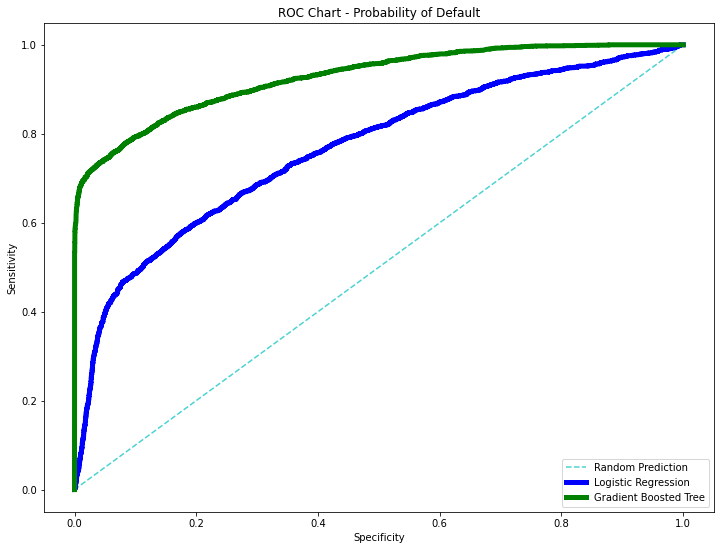

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)


# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
fallout, sensitivity, thresholds = roc_curve(y_test, clf_logistic.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,9))
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='c', alpha=0.7, linestyle='--', label='Random Prediction')
plt.plot(fallout, sensitivity, color='blue', linewidth=5, label='Logistic Regression')
fallout, sensitivity, thresholds = roc_curve(y_test, gbt.predict_proba(X_test)[:,1])
plt.plot(fallout, sensitivity, color='green', linewidth=5, label='Gradient Boosted Tree')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Chart - Probability of Default')
plt.legend(loc='lower right')
plt.show()

# ***Calibration***

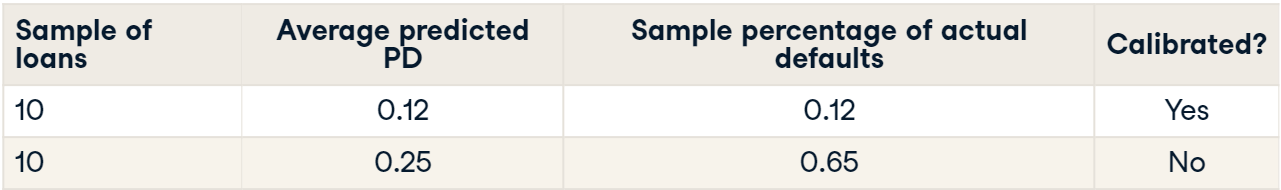

จากรูปข้างบนจะเห็นว่าบรรทัดล่างมีร้อยละของคนที่ชักดาบจริงถึงร้อยละ 65 ในขณะที่คาดการณ์ไว้แค่เพียง ร้อยละ 25 ซึ่งจะทำให้เกิดความเสียหายมาก

## ***Calculating Calibration***

* Test data is split into 5 samples 
* **`calibration_curve()`**  calculates the 
  * percentage of true defaults in each samples 
  * average probability of defaults


In [ ]:
from sklearn.calibration import calibration_curve

# Fraction of actual defaults
print(calibration_curve(y_test,  gbt.predict_proba(X_test)[:,1], n_bins=5)[0])

# Average probability
print(calibration_curve(y_test,  gbt.predict_proba(X_test)[:,1], n_bins=5)[1])

[0.0599015  0.21670429 0.41920375 0.87855297 0.9992609 ]
[0.06581889 0.27945902 0.492732   0.7036365  0.94119355]


### โค้ดด้านล่างนี้ไม่ชัวร์

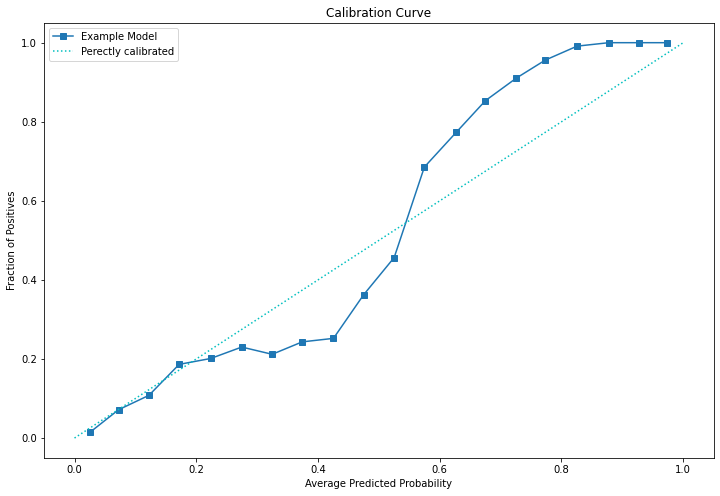

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(calibration_curve(y_test,  gbt.predict_proba(X_test)[:,1], n_bins=20)[1], calibration_curve(y_test,  gbt.predict_proba(X_test)[:,1], n_bins=20)[0], label="%s" % "Example Model", marker='s')
plt.plot([0,1], [0,1], color='c', linestyle='dotted', label='Perectly calibrated')
plt.legend()
plt.xlabel('Average Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.show()

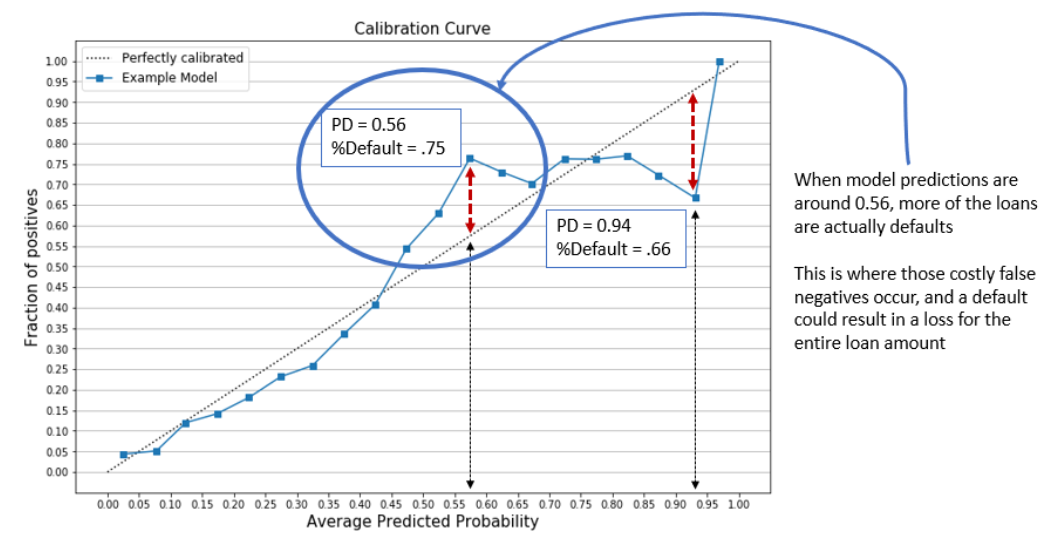

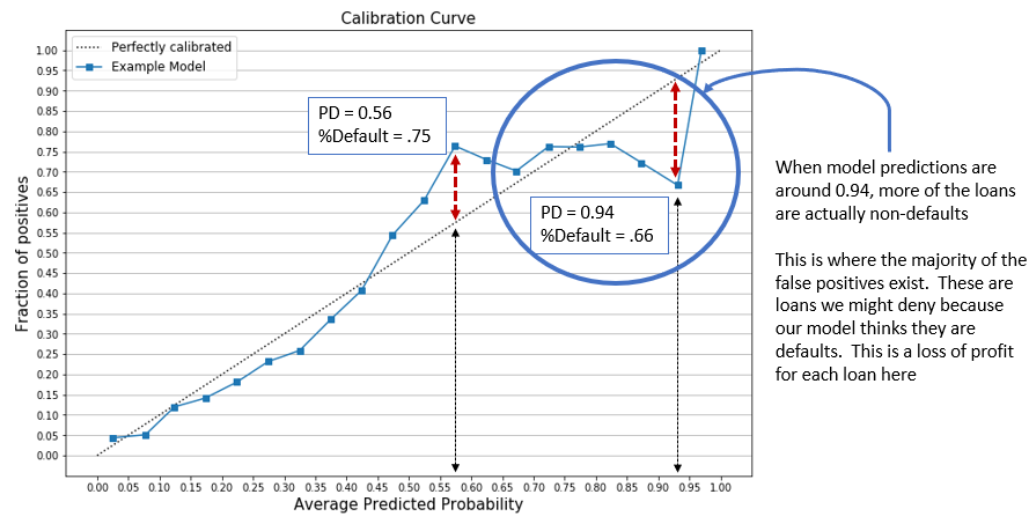

### ***Comparing model reports***

You've used logistic regression models and gradient boosted trees. It's time to compare these two to see which model will be used to make the final predictions.

One of the easiest first steps for comparing different models' ability to predict the probability of default is to look at their metrics from the **`classification_report()`**. With this, you can see many different scoring metrics side-by-side for each model. Because the data and models are normally unbalanced with few defaults, focus on the metrics for defaults for now.

The trained models `clf_logistic` and `clf_gbt` have been loaded into the workspace along with their predictions `preds_df_lr` and `preds_df_gbt`. A cutoff of `0.4` was used for each. The test set `y_test` is also available.


* Print the **`classification_report()`** for the logistic regression predictions.
* Print the **`classification_report()`** for the gradient boosted tree predictions.
* Print the macro average of the F-1 Score for the logistic regression using **`precision_recall_fscore_support()`**.
* Print the macro average of the F-1 Score for the gradient boosted tree using **`precision_recall_fscore_support()`**.

In [1]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')
avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds_lr = clf_logistic.predict_proba(X_test)

# Create a dataframe for the probabilities of default
preds_df_lr = pd.DataFrame(preds_lr[:,1], columns = ['prob_default'])

# Reassign the values of loan status based on the new threshold
preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
preds_gbt = clf_gbt.predict_proba(X_test)
preds_gbt_status = clf_gbt.predict(X_test)
preds_df_gbt = pd.DataFrame(preds_gbt[:,1], columns=['prob_default'])
preds_df_gbt['loan_status'] = clf_gbt.predict(X_test)

###############################################################################
###############################################################################

# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print("CLASSIFICATION REPORT FOR LOGISTIC REGRESSION")
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print("\nCLASSIFICATION REPORT FOR XGOOST")
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print("\nDEFAULT F1 SCORE FOR LOGISTRIC REGRESSION")
print(precision_recall_fscore_support(y_test,preds_df_lr['loan_status'], average='macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print("\nDEFAULT F1 SCORE FOR XGBOOST")
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average='macro')[2])

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9198
     Default       0.62      0.46      0.53      2586

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784


CLASSIFICATION REPORT FOR XGOOST
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9198
     Default       0.93      0.69      0.80      2586

    accuracy                           0.92     11784
   macro avg       0.93      0.84      0.87     11784
weighted avg       0.92      0.92      0.92     11784


DEFAULT F1 SCORE FOR LOGISTRIC REGRESSION
0.7108943782814463

DEFAULT F1 SCORE FOR XGBOOST
0.8742150069573906


There is a noticeable difference between these two models. Do you see that the scores from the **`classification_report()`** are all higher for the gradient boosted tree? This means the tree model is better in all of these aspects. Let's check the ROC curve.

### ***Comparing with ROCs***

You should use ROC charts and AUC scores to compare the two models. Sometimes, visuals can really help you and potential business users understand the differences between the various models under consideration.

With the graph in mind, you will be more equipped to make a decision. The lift is how far the curve is from the random prediction. The AUC is the area between the curve and the random prediction. The model with more lift, and a higher AUC, is the one that's better at making predictions accurately.

The trained models `clf_logistic` and `clf_gbt` have been loaded into the workspace. The predictions for the probability of default `clf_logistic_preds` and `clf_gbt_preds` have been loaded as well.

* Calculate the `fallout`, `sensitivity`, and `thresholds` for the logistic regression and gradient boosted tree.
* Plot the ROC chart for the `lr` then `gbt` using the `fallout` on the x-axis and sensitivity on the y-axis for each model.

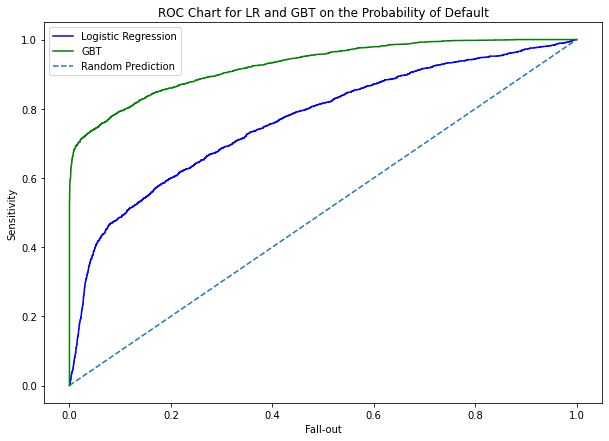

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.93


In [2]:
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt


cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')
avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds_lr = clf_logistic.predict_proba(X_test)
clf_logistic_preds = preds_lr[:, 1]

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
preds_gbt = clf_gbt.predict_proba(X_test)
clf_gbt_preds = preds_gbt[:,1]

###############################################################################
###############################################################################

# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.figure(figsize=(10,7))
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

Look at the ROC curve for the gradient boosted tree. Not only is the lift much higher, the calculated AUC score is also quite a bit higher. It's beginning to look like the gradient boosted tree is best. Let's check the calibration to be sure.

### ***Calibration curves***

You now know that the gradient boosted tree `clf_gbt` has the best overall performance. You need to check the calibration of the two models to see how stable the default prediction performance is across probabilities. You can use a chart of each model's calibration to check this by calling the **`calibration_curve()`** function.

Calibration curves can require many lines of code in python, so you will go through each step slowly to add the different components.

The two sets of predictions `clf_logistic_preds` and `clf_gbt_preds` have already been loaded into the workspace. Also, the output from **`calibration_curve()`** for each model has been loaded as: `frac_of_pos_lr`, `mean_pred_val_lr`, `frac_of_pos_gbt`, and `mean_pred_val_gbt`.

* Create a calibration curve `plot()` by starting with the perfect calibration guideline and label it `'Perfectly calibrated'.` Then add the labels for the y-axis and x-axis in order.
* Add a plot of the **mean predicted values** on the x-axis and **fraction of positives** on the y-axis for the logistic regression model to the plot of the guideline. Label this `'Logistic Regression'`.

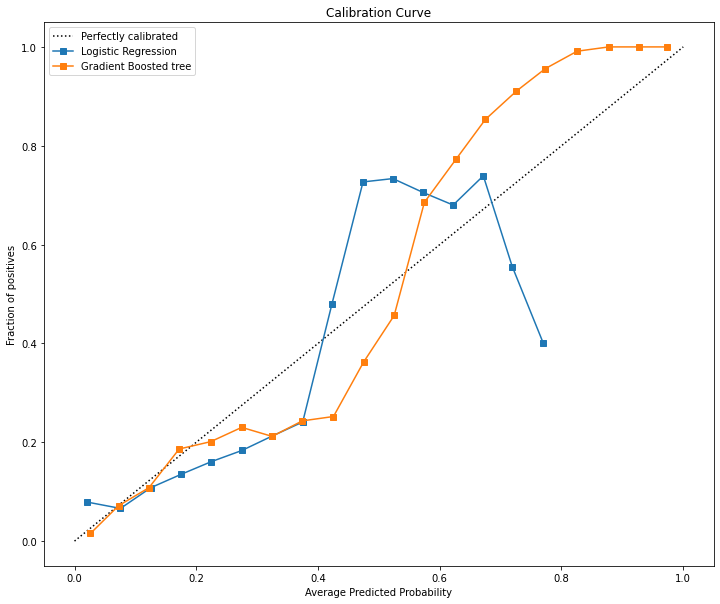

In [3]:
from sklearn.calibration import calibration_curve
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection._split import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt


cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')
avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds_lr = clf_logistic.predict_proba(X_test)
clf_logistic_preds = preds_lr[:, 1]

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
preds_gbt = clf_gbt.predict_proba(X_test)
clf_gbt_preds = preds_gbt[:,1]

frac_of_pos_lr   =  calibration_curve(y_test,  clf_logistic_preds, n_bins=20)[0]
mean_pred_val_lr =  calibration_curve(y_test,  clf_logistic_preds, n_bins=20)[1]

frac_of_pos_gbt =   calibration_curve(y_test,  clf_gbt_preds, n_bins=20)[0]
mean_pred_val_gbt = calibration_curve(y_test,  clf_gbt_preds, n_bins=20)[1] 

###############################################################################
###############################################################################

# Add the calibration curve for the gradient boosted tree
plt.figure(figsize=(12,10))
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

Notice that for the logistic regression, the calibration for probabilities starts off great but then gets more erratic as it the average probability approaches `0.4`. Something similar happens to the gradient boosted tree around `0.5`, but the model eventually stabilizes. We will be focusing on only the `gbt` model from now on.

# ***Calculate the Threshold for Default***

* Calculate the threshold value for an 85% acceptance rate

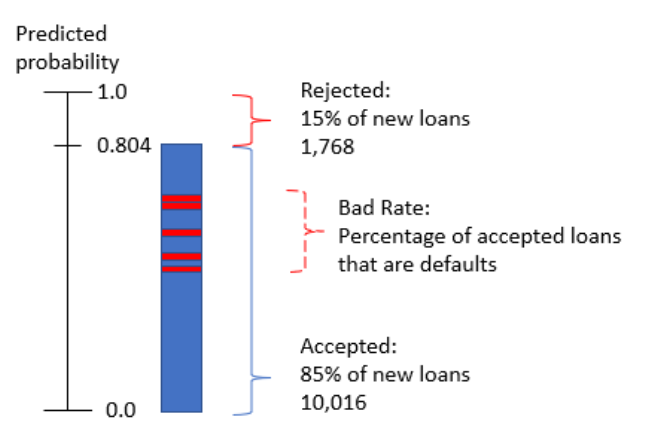

$$Bad Rate = \frac{Accepted \ Defaults}{Total \ Accepted \ Loans}$$

### ***Acceptance rates***

Setting an acceptance rate and calculating the threshold for that rate can be used to set the percentage of new loans you want to accept. For this exercise, assume the test data is a fresh batch of new loans. You will need to use the **`np.quantile`**() function from numpy to calculate the threshold.

The threshold should be used to assign new `loan_status` values. Does the number of defaults and non-defaults in the data change?

The trained model `clf_gbt` and the data frame of it's predictions, `test_pred_df`, are available.


* Print the summary statistics of `prob_default` within the data frame of predictions using **`.describe()`**.
* Calculate the threshold for a 85% acceptance rate using `np.quantile()` and store it as `threshold_85`.
* Create a new column called `pred_loan_status` based on `threshold_85`.
* Print the value counts of the new values in `pred_loan_status`.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
test_pred_df = pd.DataFrame(y_test.values, columns=['true_loan_status'])
test_pred_df['prob_default'] = clf_gbt.predict_proba(X_test)[:, 1]

###############################################################################
###############################################################################

# Check the statistics of the probabilities of default
print(test_pred_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df['pred_loan_status'].value_counts())

count    11784.000000
mean         0.218805
std          0.300486
min          0.001122
25%          0.038786
50%          0.078899
75%          0.214860
max          0.999459
Name: prob_default, dtype: float64
0    10016
1     1768
Name: pred_loan_status, dtype: int64


In the results of `.describe()` do you see how it's not until 75% that you start to see double-digit numbers? That's because ***the majority of our test set is non-default loans***. Next let's look at how the acceptance rate and threshold split up the data.

### ***Visualizing quantiles of acceptance***

You know how `np.quantile()` works to compute a threshold, and you've seen an example of what it does to split the loans into accepted and rejected. What does this threshold look like for the test set, and how can you visualize it?

To check this, you can create a histogram of the probabilities and add a reference line for the threshold. With this, you can visually show where the threshold exists in the distribution.

The model predictions `clf_gbt_preds` have been loaded into the workspace.

* Create a histogram of the predicted probabilities `clf_gbt_preds`.
* Calculate the threshold for an acceptance rate of 85% using `np.quantile()`. Store this value as threshold.
* Plot the histogram again, except this time add a reference line using **`.axvline()`**.

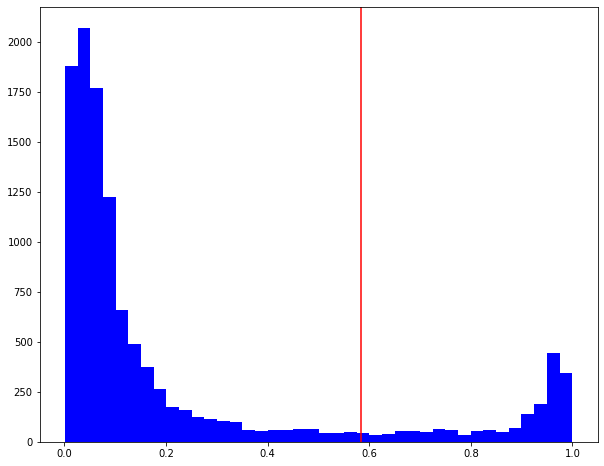

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prob Default
clf_gbt_preds = clf_gbt.predict_proba(X_test)[:, 1]

###############################################################################
###############################################################################
plt.figure(figsize=(10, 8))

# Plot the predicted probabilities of default
plt.hist(clf_gbt_preds, color='blue', bins=40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_gbt_preds, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x=threshold, color='red')
plt.show()

Here, you can see where the threshold is on the range of predicted probabilities. Not only can you see how many loans will be accepted (left side), but also how many loans will be rejected (right side). I recommend that you re-run this code with different threshold values to better understand how this affects the acceptance rate.

### ***Bad rates***

With acceptance rate in mind, you can now analyze the bad rate within the accepted loans. This way you will be able to see the percentage of defaults that have been accepted.

Think about the impact of the acceptance rate and bad rate. We set an acceptance rate to have fewer defaults in the portfolio because defaults are more costly. Will the bad rate be less than the percentage of defaults in the test data?

The predictions data frame `test_pred_df` has been loaded into the workspace.


* Print the first five rows of the predictions data frame.
* Create a subset called `accepted_loans` which only contains loans where the predicted loan status is `0`.
* Calculate the bad rate based on `true_loan_status` of the subset using `sum()` and `.count()`.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prob Default
test_pred_df = pd.DataFrame(y_test.values, columns=['true_loan_status']) 
test_pred_df['prob_default'] = clf_gbt.predict_proba(X_test)[:, 1]

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)


###############################################################################
###############################################################################

# Print the top 5 rows of the new data frame
print(test_pred_df.head())

# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans ['true_loan_status'].count())

   true_loan_status  prob_default  pred_loan_status
0                 1      0.940435                 1
1                 1      0.922014                 1
2                 0      0.021707                 0
3                 0      0.026483                 0
4                 1      0.064803                 0
0.08746006389776358


The bad rate with the threshold set by the 85% `quantile()` is about 8%. This means that ***of all the loans we've decided to accept from the test set, only 8% were actual defaults!*** If we accepted all loans, the percentage of defaults would be around 22%. (ตั้งค่า quantile = 1.0)

### ***Acceptance rate impact***

Now, look at the `loan_amnt` of each loan to understand the impact on the portfolio for the acceptance rates. You can use cross tables with calculated values, like the average loan amount, of the new set of loans `X_test`. For this, you will multiply the number of each with an average `loan_amnt` value.

When printing these values, try formatting them as currency so that the numbers look more realistic. After all, credit risk is all about money. This is accomplished with the following code:

```
pd.options.display.float_format = '${:,.2f}'.format
```

The predictions data frame `test_pred_df`, which now includes the `loan_amnt` column from `X_test`, has been loaded in the workspace.

* Print the summary statistics of the `loan_amnt` column using `.describe()`.
* Calculate the average value of `loan_amnt` and store it as `avg_loan`.
* Set the formatting for pandas to `'${:,.2f}'`
* Print the cross table of the true loan status and predicted loan status multiplying each by `avg_loan`.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prob Default
test_pred_df = pd.DataFrame(y_test.values, columns=['true_loan_status']) 
test_pred_df['prob_default'] = clf_gbt.predict_proba(X_test)[:, 1]
test_pred_df['loan_amnt'] = X_test['loan_amnt'].values


# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status_15'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)


###############################################################################
###############################################################################

# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
display(pd.crosstab(test_pred_df['true_loan_status'],
                  test_pred_df['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

count   $11,784.00
mean     $9,556.28
std      $6,238.01
min        $500.00
25%      $5,000.00
50%      $8,000.00
75%     $12,000.00
max     $35,000.00
Name: loan_amnt, dtype: float64


pred_loan_status_15,0,1
true_loan_status,,
0,"$87,344,435.25","$554,264.47"
1,"$8,371,304.74","$16,341,245.54"


With this, we can see that our bad rate of about 8% represents an estimated loan value of about 8.3 million dollars. This may seem like a lot at first, but compare it to the total value of non-default loans! With this, we are ready to start talking about our acceptance strategy going forward.

# ***Setting up the strategy table for Acceptance Rates***


In [ ]:
# Set all the acceptance rates to test
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
                0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

# Create lists to store thresholds and bad rates
thresholds = []
bad_rates = []

for rate in accept_rates:
    # Calculate threshold
    threshold = np.quantile(preds_df['prob_default'], rate).round(3)

    # Store threshold value in a list
    thresholds.append(np.quantile(preds_gbt['prob_default'], rate).round(3))

    # Apply the threshold to reassign loan_status
    test_pred_df['pred_loan_status'] = \
    test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)

    # Create accepted loans set of predicted non-defaults
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

    # Calculate and store bad rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status'])
      / accepted_loans['true_loan_status'].count()).round(3))

# ***Strategy table interpretation***

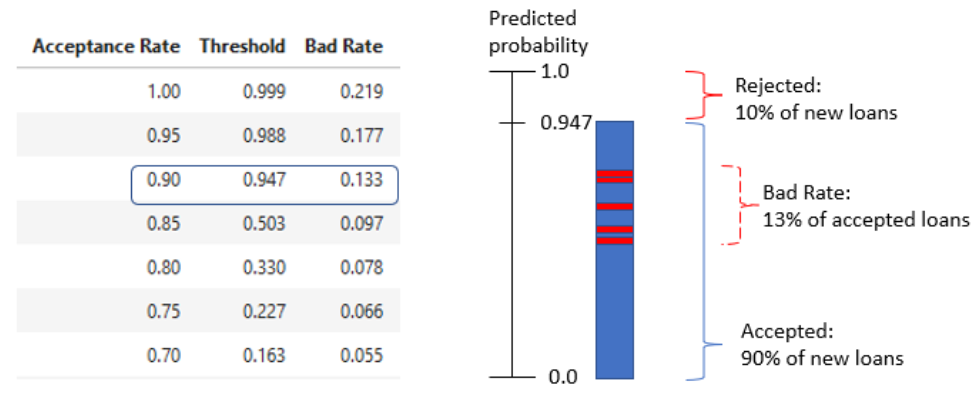

In [ ]:
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates), columns=
                       ['Acceptance Rate', 'Threshold', 'Bad Rate'])

จากรูปข้างบน จะเห็นว่า ถ้าเราเลือก acceptance rate ที่ 90% ซึ่งมีค่า `prob_default` ที่ 94.7% และมี หนี้เสีย (ทำนายว่าไม่ชักดาบ แต่ชักดาบ) อยู่ที่ 13.3%

## ***Adding accepted loans, average loan amount, and estimated portfolio***



In [ ]:
# This won't work since np.quantile(test_pred_df['prob_default'], accept_rate) 
# is of length 20 and test_pred_df['prob_default'] is of length 10,000+

len(test_pred_df[test_pred_df['prob_default'] < np.quantile(test_pred_df['prob_default'], accept_rate)])

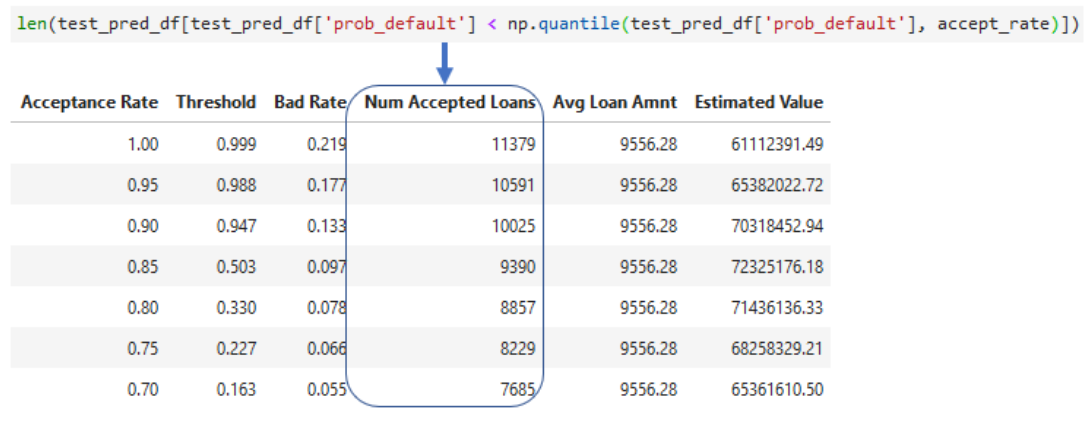





# ***Be very careful of the formula above.  If causes unexpected error when the code is written exactly as shown in slide.  The minus part must be on the same line.***

```
strat_df['Estimated value'] = ((strat_df['Num Accepted Loans'] * (1 - strat_df['Bad Rate'])) * strat_df['Avg Loan Amnt']) - (strat_df['Num Accepted Loans'] * strat_df['Bad Rate'] * strat_df['Avg Loan Amnt'])
```

* Average values of Accepted non-defaults loan
```
strat_df('Num_Accepted_Loans'] * (1 - strat_df['Bad_Rate]) * strat_df['Avg_Loan_Amnt']
```

* Average values of Accepted Defaults
```
strat_df('Num_Accepted_Loans'] * strat_df['Bad_Rate] * strat_df['Avg_Loan_Amnt']
```


# ***Total Expected Loss***

$$Total \ Expected \ Loss = \sum_{j=1}^nPD_j\times LGD_j\times EAD_j$$

In [ ]:
# Probability of default (PD)
test_pred_df['prob_default']

# Exposure at default = loan amount (EAD)
test_pred_df['loan_amnt']

# Loss given default = 1.0 for total loss (LGD)
test_pred_df['loss_given_default']

### ***Making the strategy table***

Before you implement a strategy, you should first create a strategy table containing all the possible acceptance rates you wish to look at along with their associated bad rates and threshold values. This way, you can begin to see each part of your strategy and how it affects your portfolio.

Automatically calculating all of these values only requires a **`for`** loop, but requires many lines of python code. Don't worry, most of the code is already there. Remember the calculations for `threshold` and ` bad rate`.

The array `accept_rates` has already been populated and loaded into the workspace along with the data frames `preds_df_gbt` and `test_pred_df`. The arrays `thresholds` and `bad_rates` have not been populated.

* Print the contents of `accept_rates`.
* Populate the arrays `thresholds` and `bad_rates` using a **`for`** loop. Calculate the threshold `thresh`, and store it in `thresholds`. 
* Reassign the `loan_status` values using `thresh`. 
* Create `accepted_loans` where `loan_status` is `0`.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prob Default
test_pred_df = pd.DataFrame(y_test.values, columns=['true_loan_status']) 
test_pred_df['prob_default']  = clf_gbt.predict_proba(X_test)[:, 1]
preds_df_gbt =  pd.DataFrame(data=clf_gbt.predict_proba(X_test)[:, 1], columns=['prob_default'])
test_pred_df['loan_amnt'] = X_test['loan_amnt'].values


# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status_15'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds, bad_rates = [], []
###############################################################################
###############################################################################
# Print accept rates
print(accept_rates, '\n\n\n')

# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(thresh)
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))

# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
display(strat_df)

[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05] 





,Acceptance Rate,Threshold,Bad Rate
0,1.00,0.999,0.219
1,0.95,0.962,0.178
2,0.90,0.878,0.133
3,0.85,0.584,0.088
4,0.80,0.330,0.071
5,0.75,0.215,0.061
6,0.70,0.158,0.052
7,0.65,0.128,0.046
8,0.60,0.105,0.041
9,0.55,0.090,0.037


This uses our specific predictions on the credit data, and can be used to see the acceptance rates, bad rates, and financial impact all at once. One of these values has the highest estimated value.

### ***Visualizing the strategy***

Now you have the extended strategy table `strat_df`. The table is not so big that it's difficult to analyze, but visuals can help you see the overview all at once.

You should check at the distribution of each column with a box plot. ***If the distribution of Acceptance Rate looks the same as the Bad Rate column, that could be a problem***. That means that the model's calibration is likely much worse than you thought.

You can also visualize the strategy curve with a line plot. The Acceptance Rate would be the independent variable with the Bad Rate as the dependent variable.

The strategy table `strat_df` has been loaded in the workspace.

* Create a simple **`boxplot`** of the values within `strat_df` using the pandas boxplot method.
* Create a line plot of the acceptance rates on the x-axis and bad rates on the y-axis with a `title()`, `xlabel()`, and `ylabel()`.

[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05] 





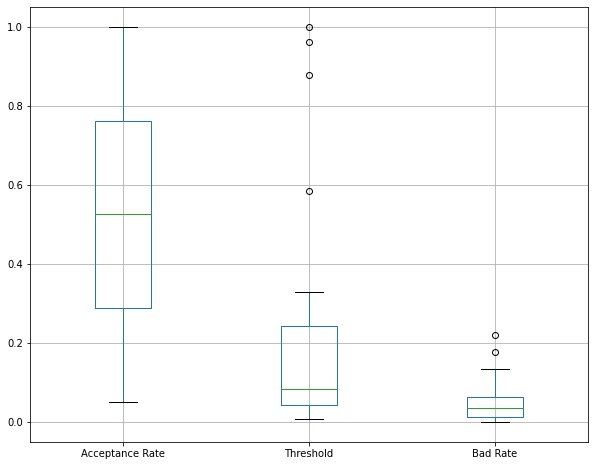

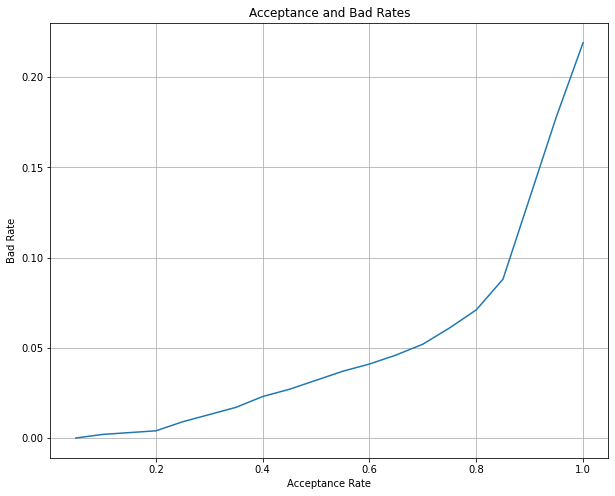

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prob Default
test_pred_df = pd.DataFrame(y_test.values, columns=['true_loan_status']) 
test_pred_df['prob_default']  = clf_gbt.predict_proba(X_test)[:, 1]
preds_df_gbt =  pd.DataFrame(data=clf_gbt.predict_proba(X_test)[:, 1], columns=['prob_default'])
test_pred_df['loan_amnt'] = X_test['loan_amnt'].values


# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status_15'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds, bad_rates = [], []

# Print accept rates
print(accept_rates, '\n\n\n')

# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(thresh)
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))

# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

###############################################################################
###############################################################################

# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot(figsize=(10, 8))
plt.show()

# Plot the strategy curve
plt.figure(figsize=(10,8))
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.grid()
plt.show()

The boxplot shows us the distribution for each column. Look at the strategy curve. The bad rates are very low up until the acceptance rate `0.6` where they suddenly increase. This suggests that many of the accepted defaults may have a `prob_default` value between `0.6` and `0.8`.

### ***Estimated value profiling***

The strategy table, `strat_df`, can be used to 

* maximize the estimated portfolio value 
* minimize expected loss

Extending this table and creating some plots can be very helpful to this end.

The `strat_df` data frame is loaded and has been enhanced already with the following columns:

```
Column	                               Description
Num Accepted Loans	The number of accepted loans based on the threshold
Avg Loan Amnt	     The average loan amount of the entire test set
Estimated value	   The estimated net value of non-defaults minus defaults
```
* Check the contents of the new `strat_df` by printing the entire data frame.

* Create a line plot of the acceptance rate on the x-axis and estimated value from `strat_df` on the y-axis with axis labels for both `x` and `y`.

* Print the row with the highest 'Estimated Value' from `strat_df`.

[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05] 





,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated value
0,1.0000,0.9995,0.2195,11783,"9,556.2839","63,180,787.4109"
1,0.9500,0.9620,0.1783,11194,"9,556.2839","68,824,356.9671"
2,0.9000,0.8779,0.1327,10605,"9,556.2839","74,453,008.2103"
3,0.8500,0.5836,0.0875,10016,"9,556.2839","78,973,130.5160"
4,0.8000,0.3298,0.0711,9427,"9,556.2839","77,281,668.2578"
5,0.7500,0.2149,0.0610,8837,"9,556.2839","74,149,538.0832"
6,0.7000,0.1584,0.0522,8247,"9,556.2839","70,576,152.3895"
7,0.6500,0.1284,0.0464,7659,"9,556.2839","66,406,617.1292"
8,0.6000,0.1048,0.0412,7070,"9,556.2839","62,001,170.2308"
9,0.5500,0.0899,0.0366,6481,"9,556.2839","57,404,597.6536"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


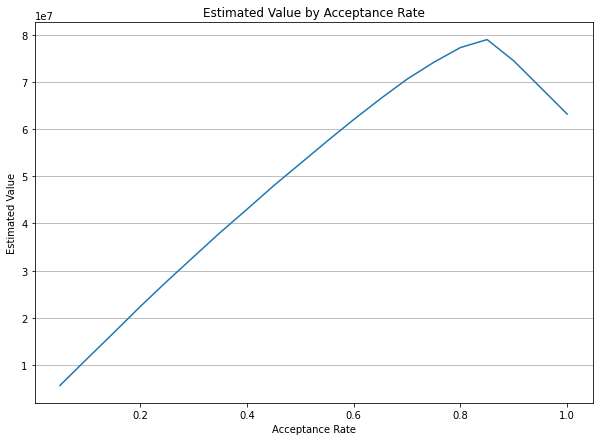

   Acceptance Rate  Threshold  ...  Avg Loan Amnt  Estimated value
3           0.8500     0.5836  ...     9,556.2839  78,973,130.5160

[1 rows x 6 columns]


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.4f}'.format

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prob Default
test_pred_df = pd.DataFrame(y_test.values, columns=['true_loan_status']) 
test_pred_df['prob_default']  = clf_gbt.predict_proba(X_test)[:,1]
preds_df_gbt =  pd.DataFrame(data=clf_gbt.predict_proba(X_test)[:,1], columns=['prob_default'])
test_pred_df['loan_amnt'] = X_test['loan_amnt'].values

accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds, bad_rates = [], []
Num_Accepted_Loans = []

# Print accept rates
print(accept_rates, '\n\n\n')

# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt['prob_default'], rate))
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])))
    
    # Adding Accepted Loans
    Num_Accepted_Loans.append(len(test_pred_df[test_pred_df['prob_default'] < np.quantile(test_pred_df['prob_default'], rate)]))

# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, Num_Accepted_Loans),
                        columns = ['Acceptance Rate','Threshold','Bad Rate', 'Num Accepted Loans'])

strat_df['Avg Loan Amnt'] = np.mean(test_pred_df['loan_amnt'])

strat_df['Estimated value'] = ((strat_df['Num Accepted Loans'] * (1 - strat_df['Bad Rate'])) * strat_df['Avg Loan Amnt']) - (strat_df['Num Accepted Loans'] * strat_df['Bad Rate'] * strat_df['Avg Loan Amnt'])

###############################################################################
###############################################################################

display(strat_df)

# Create a line plot of estimated value
plt.figure(figsize=(10, 7))
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated value'] == np.max(strat_df['Estimated value'])])

With our credit data and our estimated averag loan value, we clearly see that the acceptance rate `0.85` has the highest potential estimated value. Normally, the allowable bad rate is set, but we can use analyses like this to explore other options.

### ***Total expected loss***

It's time to estimate the total expected loss given all your decisions. The data frame `test_pred_df` has the probability of default for each loan and that loan's value. Use these two values to calculate the expected loss for each loan. Then, you can sum those values and get the total expected loss.

$$Total \ Expected \ Loss = \sum_{j=1}^{n}PD_j\times LGD_j \times EAD_j$$

For this exercise, you will assume that the exposure is the full value of the loan, and the loss given default is `100%`. This means that a default on each the loan is a loss of the entire amount.

The data frame `test_pred_df` has been loaded into the workspace.

* Print the top five rows of `test_pred_df`.
* Create a new column `expected_loss` for each loan by using the formula above.
* Calculate the total expected loss of the entire portfolio, rounded to two decimal places, and store it as `tot_exp_loss`.
* Print the total expected loss.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection._split import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.4f}'.format

cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.csv')

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])
cred_str_onehot = pd.get_dummies(cred_str)
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

# Create the X and y data sets
X = cr_loan_clean[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y = cr_loan_clean[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# XGBoost
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prob Default
test_pred_df = pd.DataFrame(y_test.values, columns=['true_loan_status']) 
test_pred_df['prob_default']  = clf_gbt.predict_proba(X_test)[:,1]
test_pred_df['loan_amnt'] = X_test['loan_amnt'].values
test_pred_df['loss_given_default'] = 1  ## Assume all default loans are lose 100%

################################################################################
################################################################################

# Print the first five rows of the data frame
print(test_pred_df.head())

# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))



   true_loan_status  prob_default  loan_amnt  loss_given_default
0                 1        0.9404      15000                   1
1                 1        0.9220      11200                   1
2                 0        0.0217      15000                   1
3                 0        0.0265      10800                   1
4                 1        0.0648       3000                   1
Total expected loss:  $27,238,566.00


This is the total expected loss for the entire portfolio using the gradient boosted tree. `$27` million may seem like a lot, but the total expected loss would have been over `$28` million with the logistic regression. Some losses are unavoidable, but your work here might have saved the company a million dollars!